In [166]:
import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import random
import os

import torch
import torch.nn as nn
import torch.nn.functional as F

from utils import *

from models import * 
import torch.optim as optim

from sklearn import preprocessing

from Experiments import *

seed = 0 

def set_seeds(seed): 
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) 

set_seeds(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

%load_ext autoreload
%autoreload 2


cuda
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
dataset = 'traffic'
data_file = "traffic_data/data.csv"
hier_file = "traffic_data/agg_mat.csv"
# data = pd.read_csv(data_file, index_col=0)
# agg_mat_df = pd.read_csv(hier_file, index_col=0)
# base_agg_mat = agg_mat_df.values

# dataset = "tourism"
# data_file = "tourism_data/data.csv"
# hier_file = "tourism_data/agg_mat.csv"

# dataset = 'labor'
# data_file = "labor/data.csv"
# hier_file = "labor/agg_mat.csv"

data = pd.read_csv(data_file, index_col=0)
agg_mat_df = pd.read_csv(hier_file, index_col=0)
base_agg_mat = agg_mat_df.values
full_agg = format_aggregation_matrix(base_agg_mat).float().to(device)

maximum = np.max(data.values)
data = (data / maximum).values

batch_size = data.shape[0]
context_window = 10
train_split = 0.8
val_split = 0.1

num_runs = 10
n_epochs = 2000

X_train, y_train, X_val, y_val, X_test, y_test = utils.get_data(data, train_split, val_split, context_window)

In [145]:
from Experiments import DropoutDistribution
# params = {'n_series':data.shape[1], 'hidden_dim':128, 'latent_dim':128, 'lr':1e-3, 'n_epochs':1000, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
#           'coherency_loss':True, 'profhit':False, 'coherency_weight':2e-4, 'project':False}
params = {'n_series':data.shape[1], 'hidden_dim':128, 'latent_dim':128, 'lr':1e-3, 'n_epochs':1000, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':True, 'profhit':False, 'coherency_weight':1e-2, 'project':False}


seed = 42
torch.manual_seed(seed)       # For CPU and CUDA (if available)
torch.cuda.manual_seed_all(seed)  # For multi-GPU setup2
np.random.seed(seed)          # NumPy
random.seed(seed)             # Python's random module
os.environ['PYTHONHASHSEED'] = str(seed)  # Hash-based operations

coherency_results, names, coherency_losses = repeat_exp(DropoutDistribution, base_agg_mat, data, params, num_runs) 

run 0


  0%|          | 3/1000 [00:00<00:54, 18.32it/s]

0.06136411055922508 15.35016918182373


  5%|▌         | 51/1000 [00:02<00:32, 28.77it/s]

0.0015459187561646104 1.0978902578353882


  9%|▉         | 93/1000 [00:04<00:39, 22.95it/s]


KeyboardInterrupt: 

In [163]:
# VAE regularization

from Experiments import VAEDistribution
# params = {'n_series':data.shape[1], 'hidden_dim':128, 'latent_dim':128, 'lr':1e-4, 'n_epochs':2000, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          # 'coherency_loss':True, 'profhit':False, 'coherency_weight':1e-2, 'project':False}
params = {'n_series':data.shape[1], 'hidden_dim':128, 'latent_dim':128, 'lr':1e-3, 'n_epochs':1000, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':True, 'profhit':False, 'coherency_weight':1e-3, 'project':False}


seed = 42
torch.manual_seed(seed)       # For CPU and CUDA (if available)
torch.cuda.manual_seed_all(seed)  # For multi-GPU setup2
np.random.seed(seed)          # NumPy
random.seed(seed)             # Python's random module
os.environ['PYTHONHASHSEED'] = str(seed)  # Hash-based operations

vae_results, names, coherency_losses = repeat_exp(VAEDistribution, base_agg_mat, data, params, num_runs) 

run 0


  0%|          | 3/1000 [00:00<00:36, 27.31it/s]

0.3421677052974701 15.35016918182373


  5%|▌         | 52/1000 [00:02<00:42, 22.12it/s]

0.012628556229174137 7.76051139831543


 10%|█         | 103/1000 [00:04<00:51, 17.55it/s]

0.0015092144021764398 5.353270530700684


 15%|█▌        | 152/1000 [00:07<00:41, 20.32it/s]

0.0006848554476164281 3.845785140991211


 20%|██        | 201/1000 [00:09<00:31, 25.54it/s]

0.00042748788837343454 2.764127016067505


 25%|██▌       | 253/1000 [00:11<00:23, 31.61it/s]

0.0002791481383610517 2.0383644104003906


 30%|███       | 305/1000 [00:13<00:28, 24.63it/s]

0.00019891976262442768 1.5427567958831787


 35%|███▌      | 352/1000 [00:15<00:27, 23.97it/s]

0.00016118156781885773 1.1619139909744263


 40%|████      | 403/1000 [00:17<00:26, 22.67it/s]

0.00014259958697948605 0.855018675327301


 45%|████▌     | 453/1000 [00:20<00:24, 22.39it/s]

0.00011779263149946928 0.6337717175483704


 50%|█████     | 504/1000 [00:22<00:21, 23.23it/s]

0.00010176052455790341 0.5316209197044373


 55%|█████▌    | 551/1000 [00:24<00:21, 20.99it/s]

8.728068496566266e-05 0.5047902464866638


 60%|██████    | 603/1000 [00:26<00:17, 22.41it/s]

8.023587724892423e-05 0.49445730447769165


 65%|██████▌   | 654/1000 [00:28<00:15, 21.81it/s]

7.151306635932997e-05 0.4863472878932953


 70%|███████   | 705/1000 [00:31<00:12, 22.76it/s]

6.704926636302844e-05 0.4786662459373474


 76%|███████▌  | 755/1000 [00:33<00:11, 20.95it/s]

6.20981227257289e-05 0.47120949625968933


 80%|████████  | 804/1000 [00:36<00:09, 19.83it/s]

5.560285717365332e-05 0.4641817808151245


 85%|████████▌ | 851/1000 [00:38<00:06, 22.87it/s]

5.060978583060205e-05 0.4571046233177185


 90%|█████████ | 903/1000 [00:40<00:04, 20.87it/s]

5.2360577683430165e-05 0.45024168491363525


 95%|█████████▌| 954/1000 [00:43<00:02, 20.51it/s]

5.1931645430158824e-05 0.44361305236816406


100%|██████████| 1000/1000 [00:45<00:00, 22.04it/s]


run 1


  0%|          | 3/1000 [00:00<00:38, 26.19it/s]

0.3409246504306793 15.062446594238281


  5%|▌         | 53/1000 [00:02<00:53, 17.72it/s]

0.01350332424044609 8.134493827819824


 10%|█         | 102/1000 [00:05<00:51, 17.30it/s]

0.0016419196035712957 5.341081619262695


 15%|█▌        | 152/1000 [00:08<00:40, 20.97it/s]

0.0007036432507447898 3.7448666095733643


 20%|██        | 203/1000 [00:10<00:39, 20.17it/s]

0.0003756946243811399 2.6849780082702637


 25%|██▌       | 253/1000 [00:12<00:34, 21.65it/s]

0.0002515387022867799 1.9849401712417603


 30%|███       | 304/1000 [00:15<00:31, 21.89it/s]

0.00018033017113339156 1.4981135129928589


 35%|███▌      | 354/1000 [00:17<00:29, 21.91it/s]

0.00013191034668125212 1.1200058460235596


 40%|████      | 404/1000 [00:19<00:30, 19.85it/s]

0.00010298674169462174 0.8176055550575256


 45%|████▌     | 453/1000 [00:22<00:24, 22.43it/s]

8.592269296059385e-05 0.6115492582321167


 50%|█████     | 505/1000 [00:24<00:20, 24.23it/s]

7.503413507947698e-05 0.5316208004951477


 55%|█████▌    | 552/1000 [00:26<00:20, 21.82it/s]

7.406436634482816e-05 0.5121821761131287


 60%|██████    | 603/1000 [00:28<00:17, 22.37it/s]

6.812503124820068e-05 0.5025006532669067


 66%|██████▌   | 655/1000 [00:30<00:11, 29.24it/s]

6.424931052606553e-05 0.49388352036476135


 70%|███████   | 704/1000 [00:33<00:11, 25.26it/s]

6.618435872951522e-05 0.4855048358440399


 75%|███████▌  | 752/1000 [00:35<00:09, 25.27it/s]

5.467611481435597e-05 0.47735595703125


 81%|████████  | 806/1000 [00:37<00:06, 29.04it/s]

5.3348263463703915e-05 0.4691004753112793


 85%|████████▌ | 852/1000 [00:39<00:07, 20.31it/s]

5.8859608543571085e-05 0.4606497585773468


 90%|█████████ | 904/1000 [00:41<00:04, 19.80it/s]

5.332736691343598e-05 0.4525359272956848


 95%|█████████▌| 952/1000 [00:43<00:01, 24.73it/s]

4.9608785047894344e-05 0.4444582164287567


100%|██████████| 1000/1000 [00:46<00:00, 21.68it/s]


run 2


  0%|          | 3/1000 [00:00<00:47, 21.00it/s]

0.3436543941497803 15.900115013122559


  5%|▌         | 53/1000 [00:02<00:50, 18.64it/s]

0.015576007775962353 8.246378898620605


 10%|█         | 104/1000 [00:05<00:45, 19.64it/s]

0.0017354247393086553 5.531618118286133


 15%|█▌        | 151/1000 [00:07<00:30, 27.56it/s]

0.0006369015318341553 3.7831132411956787


 20%|██        | 204/1000 [00:09<00:34, 23.30it/s]

0.00035477112396620214 2.580152988433838


 25%|██▌       | 254/1000 [00:12<00:36, 20.48it/s]

0.0002250672405352816 1.8107653856277466


 30%|███       | 305/1000 [00:14<00:31, 21.80it/s]

0.00016694358782842755 1.3005330562591553


 35%|███▌      | 353/1000 [00:16<00:29, 21.68it/s]

0.000130109692690894 0.913244903087616


 40%|████      | 404/1000 [00:19<00:25, 23.60it/s]

0.00010093320452142507 0.6254328489303589


 45%|████▌     | 452/1000 [00:21<00:25, 21.44it/s]

8.79699582583271e-05 0.4916098117828369


 50%|█████     | 504/1000 [00:23<00:22, 22.45it/s]

7.886260573286563e-05 0.46587634086608887


 56%|█████▌    | 555/1000 [00:26<00:16, 26.25it/s]

7.296214607777074e-05 0.4540552496910095


 60%|██████    | 604/1000 [00:28<00:19, 20.77it/s]

6.45665277261287e-05 0.4434586465358734


 65%|██████▌   | 653/1000 [00:30<00:16, 20.54it/s]

5.331755164661445e-05 0.4330042600631714


 70%|███████   | 704/1000 [00:33<00:15, 18.90it/s]

5.417831926024519e-05 0.4226471185684204


 75%|███████▌  | 753/1000 [00:35<00:10, 24.45it/s]

4.789946251548827e-05 0.4125109910964966


 80%|████████  | 804/1000 [00:37<00:08, 23.01it/s]

4.463749792193994e-05 0.40227487683296204


 86%|████████▌ | 856/1000 [00:39<00:05, 26.36it/s]

4.594817437464371e-05 0.3922816514968872


 90%|█████████ | 902/1000 [00:41<00:04, 23.26it/s]

4.403504863148555e-05 0.38224443793296814


 95%|█████████▌| 954/1000 [00:44<00:02, 20.43it/s]

4.1525887354509905e-05 0.37229254841804504


100%|██████████| 1000/1000 [00:46<00:00, 21.56it/s]


run 3


  0%|          | 3/1000 [00:00<00:44, 22.21it/s]

0.3376464247703552 14.873970031738281


  6%|▌         | 55/1000 [00:02<00:44, 21.36it/s]

0.011776482686400414 7.32762336730957


 10%|█         | 105/1000 [00:04<00:34, 25.61it/s]

0.0016192784532904625 4.984251499176025


 15%|█▌        | 153/1000 [00:07<00:39, 21.50it/s]

0.0007849757676012814 3.4713056087493896


 20%|██        | 202/1000 [00:09<00:33, 23.83it/s]

0.0004310030199121684 2.4419500827789307


 25%|██▌       | 252/1000 [00:11<00:36, 20.73it/s]

0.00030585037893615663 1.7436609268188477


 30%|███       | 303/1000 [00:14<00:31, 22.34it/s]

0.0002212193503510207 1.2531206607818604


 35%|███▌      | 354/1000 [00:16<00:20, 31.56it/s]

0.00017718790331855416 0.8933367729187012


 40%|████      | 405/1000 [00:18<00:27, 22.03it/s]

0.00014443779946304858 0.644129753112793


 45%|████▌     | 453/1000 [00:20<00:25, 21.45it/s]

0.00011575589451240376 0.5315678119659424


 50%|█████     | 503/1000 [00:22<00:21, 22.93it/s]

0.00011153874947922304 0.5044258236885071


 55%|█████▌    | 552/1000 [00:24<00:13, 33.52it/s]

9.0700552391354e-05 0.49244797229766846


 60%|██████    | 603/1000 [00:26<00:13, 29.46it/s]

8.874927880242467e-05 0.4818335771560669


 66%|██████▌   | 656/1000 [00:28<00:11, 28.78it/s]

7.545345579273999e-05 0.471724271774292


 70%|███████   | 702/1000 [00:30<00:13, 22.37it/s]

7.149700104491785e-05 0.4624931812286377


 75%|███████▌  | 753/1000 [00:32<00:10, 23.35it/s]

6.743948324583471e-05 0.45304757356643677


 80%|████████  | 805/1000 [00:34<00:06, 28.02it/s]

7.069454295560718e-05 0.44472306966781616


 85%|████████▌ | 854/1000 [00:36<00:04, 32.35it/s]

6.333482451736927e-05 0.4359009861946106


 91%|█████████ | 906/1000 [00:38<00:03, 27.42it/s]

6.113646668381989e-05 0.42778006196022034


 95%|█████████▌| 953/1000 [00:39<00:02, 23.23it/s]

6.341707921819761e-05 0.4199410378932953


100%|██████████| 1000/1000 [00:42<00:00, 23.80it/s]


run 4


  0%|          | 2/1000 [00:00<00:58, 17.07it/s]

0.34340813755989075 15.490764617919922


  5%|▌         | 54/1000 [00:03<00:53, 17.76it/s]

0.01151223387569189 8.38219165802002


 10%|█         | 104/1000 [00:05<00:34, 25.89it/s]

0.0016032465500757098 6.05548620223999


 15%|█▌        | 153/1000 [00:07<00:35, 23.55it/s]

0.0006912926910445094 4.483987331390381


 20%|██        | 204/1000 [00:09<00:35, 22.56it/s]

0.0004280628345441073 3.288633108139038


 26%|██▌       | 255/1000 [00:11<00:32, 22.88it/s]

0.00028447731165215373 2.416090726852417


 30%|███       | 304/1000 [00:13<00:28, 24.57it/s]

0.0002058838726952672 1.7894705533981323


 35%|███▌      | 353/1000 [00:16<00:26, 24.23it/s]

0.00016140425577759743 1.3260616064071655


 40%|████      | 405/1000 [00:18<00:22, 26.45it/s]

0.0001334660773864016 0.9742512702941895


 45%|████▌     | 453/1000 [00:20<00:24, 22.01it/s]

0.00011417177302064374 0.7205526828765869


 50%|█████     | 504/1000 [00:22<00:21, 23.43it/s]

9.332263289252296e-05 0.5946234464645386


 56%|█████▌    | 555/1000 [00:24<00:17, 25.15it/s]

9.351511835120618e-05 0.5620337724685669


 60%|██████    | 604/1000 [00:27<00:18, 21.52it/s]

7.87293174653314e-05 0.5505728721618652


 65%|██████▌   | 654/1000 [00:29<00:17, 20.34it/s]

6.954126001801342e-05 0.5414240956306458


 70%|███████   | 702/1000 [00:31<00:13, 22.88it/s]

6.153670256026089e-05 0.5328282117843628


 75%|███████▌  | 751/1000 [00:33<00:11, 21.81it/s]

5.720731132896617e-05 0.5245702266693115


 80%|████████  | 805/1000 [00:36<00:08, 22.43it/s]

5.456193321151659e-05 0.5164756178855896


 85%|████████▌ | 854/1000 [00:38<00:06, 24.01it/s]

6.251521699596196e-05 0.5082159638404846


 90%|█████████ | 904/1000 [00:40<00:04, 21.67it/s]

5.423092079581693e-05 0.5004937052726746


 95%|█████████▌| 952/1000 [00:42<00:02, 21.39it/s]

4.885840826318599e-05 0.493202805519104


100%|██████████| 1000/1000 [00:44<00:00, 22.39it/s]


run 5


  0%|          | 3/1000 [00:00<00:47, 20.88it/s]

0.338663250207901 14.383892059326172


  5%|▌         | 53/1000 [00:03<00:45, 20.82it/s]

0.013809717260301113 7.452025890350342


 10%|█         | 102/1000 [00:05<00:40, 21.99it/s]

0.0018137417500838637 4.823266983032227


 15%|█▌        | 153/1000 [00:07<00:39, 21.53it/s]

0.0007694115629419684 3.200003147125244


 21%|██        | 206/1000 [00:10<00:31, 25.53it/s]

0.0004795483546331525 2.0570766925811768


 26%|██▌       | 256/1000 [00:12<00:27, 26.78it/s]

0.00033842388074845076 1.330788016319275


 30%|███       | 303/1000 [00:14<00:25, 27.78it/s]

0.00024300246150232852 0.8625919818878174


 35%|███▌      | 352/1000 [00:16<00:28, 23.01it/s]

0.000193219690117985 0.5694717764854431


 40%|████      | 404/1000 [00:18<00:23, 25.18it/s]

0.00016823642363306135 0.4465910792350769


 45%|████▌     | 454/1000 [00:20<00:22, 24.68it/s]

0.00012874376261606812 0.4222224950790405


 50%|█████     | 502/1000 [00:22<00:23, 21.16it/s]

0.00011719646136043593 0.41031891107559204


 55%|█████▌    | 553/1000 [00:25<00:23, 19.20it/s]

9.5678711659275e-05 0.3994711637496948


 60%|██████    | 605/1000 [00:27<00:17, 22.86it/s]

9.567866800352931e-05 0.3889847695827484


 65%|██████▌   | 653/1000 [00:30<00:15, 21.87it/s]

8.710925612831488e-05 0.37926390767097473


 70%|███████   | 704/1000 [00:32<00:12, 22.95it/s]

7.546740380348638e-05 0.36986419558525085


 75%|███████▌  | 754/1000 [00:34<00:08, 27.67it/s]

7.011625712038949e-05 0.3606092929840088


 80%|████████  | 803/1000 [00:36<00:08, 22.47it/s]

6.220380601007491e-05 0.3516791760921478


 85%|████████▌ | 853/1000 [00:39<00:07, 20.44it/s]

6.877059786347672e-05 0.34290534257888794


 90%|█████████ | 904/1000 [00:41<00:04, 20.96it/s]

6.77192147122696e-05 0.33400118350982666


 95%|█████████▌| 951/1000 [00:43<00:02, 21.97it/s]

5.795078322989866e-05 0.32569101452827454


100%|██████████| 1000/1000 [00:46<00:00, 21.70it/s]


run 6


  0%|          | 3/1000 [00:00<00:45, 21.88it/s]

0.33908653259277344 14.723292350769043


  5%|▌         | 54/1000 [00:02<00:42, 22.25it/s]

0.010059901513159275 7.613899230957031


 10%|█         | 101/1000 [00:04<00:37, 24.27it/s]

0.001675616716966033 5.2126030921936035


 15%|█▌        | 153/1000 [00:07<00:41, 20.20it/s]

0.0007371463580057025 3.690241813659668


 20%|██        | 203/1000 [00:09<00:36, 21.75it/s]

0.0004258878470864147 2.6866118907928467


 25%|██▌       | 254/1000 [00:12<00:32, 22.62it/s]

0.00027292294544167817 2.0317652225494385


 30%|███       | 303/1000 [00:14<00:32, 21.73it/s]

0.00021389099129009992 1.5644053220748901


 35%|███▌      | 352/1000 [00:16<00:30, 20.93it/s]

0.00017140457930509 1.1921465396881104


 40%|████      | 403/1000 [00:18<00:28, 20.85it/s]

0.00014678579464089125 0.89168381690979


 45%|████▌     | 454/1000 [00:21<00:26, 20.81it/s]

0.00012401874118950218 0.6813662052154541


 50%|█████     | 504/1000 [00:23<00:25, 19.77it/s]

0.00010327581549063325 0.5864894390106201


 55%|█████▌    | 553/1000 [00:25<00:18, 23.97it/s]

0.00010329968790756539 0.560808002948761


 60%|██████    | 603/1000 [00:28<00:16, 23.70it/s]

8.678388985572383e-05 0.5514670610427856


 66%|██████▌   | 655/1000 [00:30<00:14, 23.56it/s]

8.048884046729654e-05 0.544475257396698


 70%|███████   | 703/1000 [00:32<00:14, 20.48it/s]

6.855202809674665e-05 0.5379709005355835


 75%|███████▌  | 753/1000 [00:34<00:11, 22.03it/s]

6.0869657318107784e-05 0.5318036079406738


 80%|████████  | 804/1000 [00:37<00:09, 21.11it/s]

5.797330231871456e-05 0.5258001089096069


 86%|████████▌ | 855/1000 [00:39<00:06, 23.53it/s]

6.0337984905345365e-05 0.5198646783828735


 90%|█████████ | 905/1000 [00:41<00:04, 23.71it/s]

5.474861973198131e-05 0.5139618515968323


 95%|█████████▌| 953/1000 [00:44<00:02, 20.64it/s]

5.1530918426578864e-05 0.5081042647361755


100%|██████████| 1000/1000 [00:46<00:00, 21.66it/s]


run 7


  0%|          | 3/1000 [00:00<00:38, 26.17it/s]

0.33779796957969666 14.224775314331055


  5%|▌         | 52/1000 [00:02<00:47, 20.09it/s]

0.011477560736238956 7.434600830078125


 10%|█         | 103/1000 [00:05<00:44, 20.25it/s]

0.0014944542199373245 5.235466480255127


 15%|█▌        | 153/1000 [00:07<00:47, 17.78it/s]

0.0006288415170274675 3.8797340393066406


 20%|██        | 202/1000 [00:09<00:39, 20.10it/s]

0.0003234821488149464 2.916170120239258


 25%|██▌       | 253/1000 [00:12<00:35, 20.81it/s]

0.00020936100918333977 2.2193636894226074


 30%|███       | 302/1000 [00:14<00:37, 18.83it/s]

0.00013926082465332001 1.696638584136963


 35%|███▌      | 352/1000 [00:17<00:34, 18.75it/s]

0.00011011221067747101 1.2892169952392578


 40%|████      | 403/1000 [00:19<00:31, 18.86it/s]

9.546842920826748e-05 0.9647852182388306


 45%|████▌     | 453/1000 [00:22<00:26, 20.46it/s]

8.682259795023128e-05 0.7079848051071167


 50%|█████     | 503/1000 [00:24<00:26, 18.88it/s]

7.251976057887077e-05 0.5363982319831848


 55%|█████▌    | 553/1000 [00:27<00:18, 23.83it/s]

7.038018520688638e-05 0.46444693207740784


 60%|██████    | 603/1000 [00:29<00:19, 20.40it/s]

6.269030563998967e-05 0.4431435465812683


 65%|██████▌   | 652/1000 [00:31<00:17, 20.22it/s]

6.027087147231214e-05 0.4335348308086395


 70%|███████   | 702/1000 [00:34<00:15, 19.40it/s]

5.6768851209199056e-05 0.42580437660217285


 75%|███████▌  | 754/1000 [00:36<00:10, 23.51it/s]

5.1857790822396055e-05 0.4183722734451294


 80%|████████  | 802/1000 [00:38<00:08, 24.63it/s]

6.027224662830122e-05 0.4112125337123871


 86%|████████▌ | 855/1000 [00:40<00:06, 23.62it/s]

4.7979709052015096e-05 0.4041629433631897


 90%|█████████ | 903/1000 [00:42<00:04, 22.36it/s]

4.917661499348469e-05 0.39709630608558655


 96%|█████████▌| 956/1000 [00:45<00:01, 23.88it/s]

4.873944271821529e-05 0.39015376567840576


100%|██████████| 1000/1000 [00:47<00:00, 21.18it/s]


run 8


  0%|          | 3/1000 [00:00<00:39, 25.48it/s]

0.3403030037879944 16.275955200195312


  5%|▌         | 53/1000 [00:02<00:48, 19.65it/s]

0.010066299699246883 8.569037437438965


 10%|█         | 102/1000 [00:05<00:46, 19.48it/s]

0.0012869277270510793 6.44935417175293


 16%|█▌        | 156/1000 [00:07<00:34, 24.58it/s]

0.0005434496561065316 4.770341396331787


 20%|██        | 203/1000 [00:09<00:39, 20.08it/s]

0.0002911383635364473 3.4895734786987305


 25%|██▌       | 252/1000 [00:11<00:35, 20.92it/s]

0.0001794601557776332 2.584475517272949


 30%|███       | 303/1000 [00:14<00:31, 22.18it/s]

0.00013226285227574408 1.9611096382141113


 35%|███▌      | 354/1000 [00:16<00:28, 22.66it/s]

0.00010501866199774668 1.5087835788726807


 40%|████      | 404/1000 [00:18<00:25, 23.80it/s]

8.90959709067829e-05 1.161310076713562


 45%|████▌     | 452/1000 [00:20<00:26, 20.81it/s]

7.54059074097313e-05 0.8921384811401367


 50%|█████     | 503/1000 [00:23<00:24, 20.68it/s]

7.054516754578799e-05 0.6955892443656921


 55%|█████▌    | 552/1000 [00:25<00:19, 22.54it/s]

7.086077675921842e-05 0.5799710154533386


 60%|██████    | 603/1000 [00:27<00:19, 20.73it/s]

6.309797026915476e-05 0.5299544334411621


 65%|██████▌   | 652/1000 [00:30<00:15, 22.40it/s]

6.344514258671552e-05 0.5104200839996338


 70%|███████   | 704/1000 [00:32<00:13, 22.01it/s]

6.0281006881268695e-05 0.5004383325576782


 76%|███████▌  | 757/1000 [00:34<00:08, 28.86it/s]

5.271000918583013e-05 0.49288466572761536


 80%|████████  | 804/1000 [00:36<00:09, 20.73it/s]

5.986944233882241e-05 0.48581284284591675


 85%|████████▌ | 854/1000 [00:39<00:05, 24.58it/s]

5.169056748854928e-05 0.4792339503765106


 90%|█████████ | 903/1000 [00:41<00:03, 24.45it/s]

4.943112435285002e-05 0.472359836101532


 95%|█████████▌| 953/1000 [00:43<00:01, 23.71it/s]

4.8246391088468954e-05 0.4657244086265564


100%|██████████| 1000/1000 [00:45<00:00, 22.02it/s]


run 9


  0%|          | 3/1000 [00:00<00:47, 21.16it/s]

0.3439435064792633 13.99921703338623


  5%|▌         | 53/1000 [00:02<00:41, 22.75it/s]

0.01452822145074606 7.201664924621582


 10%|█         | 101/1000 [00:05<00:40, 22.03it/s]

0.0015983091434463859 4.578166961669922


 15%|█▌        | 153/1000 [00:07<00:43, 19.46it/s]

0.0007333121611736715 3.1441593170166016


 20%|██        | 204/1000 [00:10<00:39, 20.29it/s]

0.00040314928628504276 2.180119037628174


 25%|██▌       | 253/1000 [00:12<00:27, 27.54it/s]

0.00024843864957802 1.524267554283142


 30%|███       | 305/1000 [00:14<00:27, 25.52it/s]

0.00017493088671471924 1.0625584125518799


 35%|███▌      | 353/1000 [00:16<00:25, 24.98it/s]

0.00014379681670106947 0.7316600680351257


 40%|████      | 403/1000 [00:18<00:26, 22.40it/s]

0.00012093334953533486 0.5235657095909119


 45%|████▌     | 453/1000 [00:20<00:21, 25.21it/s]

9.771785698831081e-05 0.45338499546051025


 50%|█████     | 503/1000 [00:23<00:22, 21.87it/s]

8.728422835702077e-05 0.4387418329715729


 55%|█████▌    | 554/1000 [00:25<00:19, 22.59it/s]

7.481173088308424e-05 0.43038761615753174


 60%|██████    | 602/1000 [00:27<00:19, 20.04it/s]

6.851144280517474e-05 0.4226823151111603


 65%|██████▌   | 654/1000 [00:29<00:14, 24.38it/s]

6.664606189588085e-05 0.41531407833099365


 70%|███████   | 703/1000 [00:32<00:13, 21.27it/s]

6.465912883868441e-05 0.40817081928253174


 75%|███████▌  | 754/1000 [00:34<00:10, 22.93it/s]

6.0316695453366265e-05 0.401192307472229


 80%|████████  | 802/1000 [00:36<00:09, 21.14it/s]

5.119681009091437e-05 0.39436614513397217


 85%|████████▌ | 853/1000 [00:38<00:06, 21.06it/s]

5.603422687272541e-05 0.3875446021556854


 90%|█████████ | 903/1000 [00:41<00:03, 26.84it/s]

4.915874160360545e-05 0.380911260843277


 95%|█████████▌| 953/1000 [00:43<00:01, 25.02it/s]

4.5026834413874894e-05 0.374602735042572


100%|██████████| 1000/1000 [00:45<00:00, 22.01it/s]


In [7]:
# Vanilla Dropout 

params = {'n_series':data.shape[1], 'hidden_dim':128, 'latent_dim':128, 'lr':1e-3, 'n_epochs':1000, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False, 'profhit':False, 'coherency_weight':0, 'project':False}
seed = 42
torch.manual_seed(seed)       # For CPU and CUDA (if available)
torch.cuda.manual_seed_all(seed)  # For multi-GPU setups
np.random.seed(seed)          # NumPy
random.seed(seed)             # Python's random module
os.environ['PYTHONHASHSEED'] = str(seed)  # Hash-based operations

base_results, names, coherency_losses = repeat_exp(DropoutDistribution, base_agg_mat, data, params, num_runs) 

run 0


  0%|          | 4/1000 [00:00<00:35, 28.45it/s]

0.057155851274728775 0


  6%|▌         | 55/1000 [00:01<00:20, 46.74it/s]

0.0018909478094428778 0


 11%|█         | 107/1000 [00:02<00:18, 47.13it/s]

0.000908303540199995 0


 16%|█▌        | 159/1000 [00:03<00:17, 47.40it/s]

0.0005351045401766896 0


 20%|██        | 205/1000 [00:04<00:17, 46.34it/s]

0.0003371266066096723 0


 26%|██▌       | 258/1000 [00:05<00:15, 48.33it/s]

0.0002483299176674336 0


 31%|███       | 310/1000 [00:06<00:14, 48.79it/s]

0.00017229205695912242 0


 36%|███▌      | 355/1000 [00:07<00:13, 46.61it/s]

0.00013377337018027902 0


 41%|████      | 406/1000 [00:08<00:12, 47.29it/s]

0.00010387219663243741 0


 46%|████▌     | 459/1000 [00:09<00:11, 49.14it/s]

7.828481466276571e-05 0


 50%|█████     | 505/1000 [00:10<00:10, 47.20it/s]

6.22099541942589e-05 0


 56%|█████▌    | 558/1000 [00:11<00:09, 49.08it/s]

6.039385334588587e-05 0


 61%|██████    | 610/1000 [00:12<00:08, 48.25it/s]

5.0043683586409315e-05 0


 66%|██████▌   | 657/1000 [00:13<00:07, 48.43it/s]

4.779509617947042e-05 0


 71%|███████   | 708/1000 [00:14<00:06, 48.56it/s]

3.7549521948676556e-05 0


 76%|███████▌  | 755/1000 [00:15<00:05, 48.57it/s]

3.538384407875128e-05 0


 81%|████████  | 806/1000 [00:16<00:03, 48.71it/s]

3.243668834329583e-05 0


 86%|████████▌ | 857/1000 [00:17<00:02, 49.28it/s]

3.0301405786303803e-05 0


 91%|█████████ | 909/1000 [00:19<00:01, 48.28it/s]

2.8226375434314832e-05 0


 96%|█████████▌| 960/1000 [00:20<00:00, 48.33it/s]

2.8407937861629762e-05 0


100%|██████████| 1000/1000 [00:20<00:00, 47.74it/s]


In [154]:
# VAE Vanilla 

params = {'n_series':data.shape[1], 'hidden_dim':128, 'latent_dim':128, 'lr':1e-3, 'n_epochs':1000, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False, 'profhit':False, 'coherency_weight':0, 'project':False}
seed = 42
torch.manual_seed(seed)       # For CPU and CUDA (if available)
torch.cuda.manual_seed_all(seed)  # For multi-GPU setups
np.random.seed(seed)          # NumPy
random.seed(seed)             # Python's random module
os.environ['PYTHONHASHSEED'] = str(seed)  # Hash-based operations

base_vae_results, names, coherency_losses = repeat_exp(VAEDistribution, base_agg_mat, data, params, num_runs) 

run 0


  0%|          | 2/1000 [00:00<00:57, 17.45it/s]

0.3421677052974701 0


  5%|▌         | 53/1000 [00:02<00:37, 25.53it/s]

0.06157686188817024 0


 10%|█         | 102/1000 [00:04<00:43, 20.52it/s]

0.024341976270079613 0


 15%|█▌        | 153/1000 [00:07<00:39, 21.57it/s]

0.011391744948923588 0


 20%|██        | 202/1000 [00:09<00:36, 22.09it/s]

0.00658075837418437 0


 25%|██▌       | 253/1000 [00:11<00:35, 20.78it/s]

0.004646578803658485 0


 30%|███       | 304/1000 [00:13<00:29, 23.35it/s]

0.0035969747696071863 0


 36%|███▌      | 355/1000 [00:16<00:28, 23.03it/s]

0.0027132509276270866 0


 40%|████      | 403/1000 [00:18<00:25, 23.02it/s]

0.0023278584703803062 0


 45%|████▌     | 454/1000 [00:20<00:22, 23.88it/s]

0.002023983048275113 0


 50%|█████     | 505/1000 [00:22<00:21, 23.42it/s]

0.0017086634179577231 0


 55%|█████▌    | 553/1000 [00:25<00:19, 22.85it/s]

0.0013842827174812555 0


 60%|██████    | 604/1000 [00:27<00:17, 22.05it/s]

0.001250983215868473 0


 65%|██████▌   | 654/1000 [00:29<00:14, 23.25it/s]

0.0010335433762520552 0


 70%|███████   | 705/1000 [00:31<00:13, 21.75it/s]

0.0009616689058020711 0


 75%|███████▌  | 753/1000 [00:34<00:11, 21.65it/s]

0.0008837787318043411 0


 80%|████████  | 804/1000 [00:36<00:08, 23.27it/s]

0.0007645310251973569 0


 85%|████████▌ | 852/1000 [00:38<00:06, 22.46it/s]

0.0006843881565146148 0


 90%|█████████ | 903/1000 [00:40<00:03, 27.42it/s]

0.0006362729473039508 0


 95%|█████████▌| 953/1000 [00:42<00:01, 25.63it/s]

0.0005908251623623073 0


100%|██████████| 1000/1000 [00:44<00:00, 22.40it/s]


run 1


  0%|          | 3/1000 [00:00<00:47, 21.02it/s]

0.3409246504306793 0


  5%|▌         | 53/1000 [00:02<00:41, 22.94it/s]

0.06435997039079666 0


 10%|█         | 102/1000 [00:04<00:40, 22.28it/s]

0.02448737807571888 0


 15%|█▌        | 153/1000 [00:06<00:34, 24.53it/s]

0.012156065553426743 0


 20%|██        | 202/1000 [00:08<00:35, 22.56it/s]

0.0072492146864533424 0


 25%|██▌       | 253/1000 [00:10<00:28, 25.93it/s]

0.004862156696617603 0


 30%|███       | 304/1000 [00:12<00:28, 24.52it/s]

0.003704746952280402 0


 35%|███▌      | 354/1000 [00:14<00:27, 23.56it/s]

0.002949662506580353 0


 40%|████      | 405/1000 [00:17<00:22, 26.39it/s]

0.002291537821292877 0


 46%|████▌     | 455/1000 [00:19<00:23, 23.55it/s]

0.0019882081542164087 0


 50%|█████     | 502/1000 [00:21<00:18, 26.35it/s]

0.0017436427297070622 0


 55%|█████▌    | 554/1000 [00:23<00:18, 24.30it/s]

0.001490848371759057 0


 60%|██████    | 605/1000 [00:25<00:17, 22.01it/s]

0.0012753581395372748 0


 65%|██████▌   | 653/1000 [00:27<00:14, 24.65it/s]

0.0012391619384288788 0


 70%|███████   | 704/1000 [00:29<00:12, 24.29it/s]

0.0009828303009271622 0


 75%|███████▌  | 753/1000 [00:31<00:11, 21.67it/s]

0.0009357616654597223 0


 81%|████████  | 806/1000 [00:33<00:06, 28.80it/s]

0.0008669776143506169 0


 86%|████████▌ | 856/1000 [00:35<00:05, 25.45it/s]

0.0007452464196830988 0


 90%|█████████ | 904/1000 [00:37<00:04, 22.63it/s]

0.0006822262075729668 0


 95%|█████████▌| 953/1000 [00:39<00:02, 22.46it/s]

0.0006536472938023508 0


100%|██████████| 1000/1000 [00:41<00:00, 23.96it/s]


run 2


  0%|          | 2/1000 [00:00<00:57, 17.22it/s]

0.3436543941497803 0


  5%|▌         | 53/1000 [00:02<00:45, 20.59it/s]

0.06726416200399399 0


 10%|█         | 105/1000 [00:05<00:37, 24.03it/s]

0.029034927487373352 0


 15%|█▌        | 153/1000 [00:07<00:39, 21.30it/s]

0.014277460053563118 0


 20%|██        | 202/1000 [00:09<00:38, 20.48it/s]

0.008782966062426567 0


 25%|██▌       | 254/1000 [00:12<00:33, 22.25it/s]

0.00585701409727335 0


 30%|███       | 305/1000 [00:14<00:30, 22.43it/s]

0.00442265160381794 0


 35%|███▌      | 353/1000 [00:16<00:28, 22.95it/s]

0.0037047218065708876 0


 40%|████      | 404/1000 [00:18<00:27, 21.82it/s]

0.0028892438858747482 0


 45%|████▌     | 453/1000 [00:21<00:26, 20.42it/s]

0.002443380421027541 0


 50%|█████     | 503/1000 [00:23<00:22, 21.88it/s]

0.0020986339077353477 0


 56%|█████▌    | 555/1000 [00:25<00:17, 25.09it/s]

0.0018780548125505447 0


 61%|██████    | 606/1000 [00:27<00:12, 32.62it/s]

0.0015962563920766115 0


 65%|██████▌   | 652/1000 [00:29<00:13, 26.67it/s]

0.0014131591888144612 0


 70%|███████   | 705/1000 [00:31<00:12, 24.35it/s]

0.0012539350427687168 0


 76%|███████▌  | 756/1000 [00:33<00:08, 30.29it/s]

0.001126418705098331 0


 80%|████████  | 805/1000 [00:35<00:07, 24.75it/s]

0.0010299045825377107 0


 85%|████████▌ | 854/1000 [00:37<00:05, 24.70it/s]

0.0009516997379250824 0


 90%|█████████ | 905/1000 [00:39<00:04, 22.59it/s]

0.0008151939255185425 0


 96%|█████████▌| 955/1000 [00:41<00:01, 22.56it/s]

0.0007512533920817077 0


100%|██████████| 1000/1000 [00:43<00:00, 22.85it/s]


run 3


  0%|          | 3/1000 [00:00<00:42, 23.38it/s]

0.3376464247703552 0


  5%|▌         | 54/1000 [00:02<00:33, 28.36it/s]

0.06341130286455154 0


 10%|█         | 104/1000 [00:04<00:36, 24.66it/s]

0.024873390793800354 0


 15%|█▌        | 152/1000 [00:06<00:38, 22.07it/s]

0.012498941272497177 0


 20%|██        | 204/1000 [00:08<00:24, 32.37it/s]

0.007323197554796934 0


 26%|██▌       | 255/1000 [00:10<00:30, 24.35it/s]

0.005202722270041704 0


 30%|███       | 303/1000 [00:12<00:31, 22.13it/s]

0.0040437341667711735 0


 36%|███▌      | 356/1000 [00:13<00:16, 38.76it/s]

0.003032208187505603 0


 40%|████      | 404/1000 [00:15<00:26, 22.53it/s]

0.0025735092349350452 0


 45%|████▌     | 453/1000 [00:17<00:22, 24.18it/s]

0.00209598895162344 0


 50%|█████     | 501/1000 [00:19<00:16, 31.06it/s]

0.0018372924532741308 0


 55%|█████▌    | 553/1000 [00:21<00:19, 23.46it/s]

0.0015118381706997752 0


 60%|██████    | 604/1000 [00:24<00:16, 24.26it/s]

0.001379860332235694 0


 65%|██████▌   | 654/1000 [00:26<00:14, 24.22it/s]

0.0011352598667144775 0


 70%|███████   | 703/1000 [00:28<00:12, 23.59it/s]

0.0010415673023089767 0


 75%|███████▌  | 754/1000 [00:30<00:10, 23.38it/s]

0.0009414597880095243 0


 80%|████████  | 802/1000 [00:33<00:08, 22.43it/s]

0.0008471001638099551 0


 86%|████████▌ | 855/1000 [00:35<00:05, 24.54it/s]

0.000759839778766036 0


 90%|█████████ | 904/1000 [00:37<00:03, 24.44it/s]

0.0007140296511352062 0


 95%|█████████▌| 952/1000 [00:39<00:02, 21.10it/s]

0.0006437740521505475 0


100%|██████████| 1000/1000 [00:41<00:00, 24.14it/s]


run 4


  0%|          | 3/1000 [00:00<00:40, 24.62it/s]

0.34340813755989075 0


  5%|▌         | 53/1000 [00:02<00:52, 17.93it/s]

0.05876970291137695 0


 10%|█         | 102/1000 [00:04<00:43, 20.44it/s]

0.01953817717730999 0


 15%|█▌        | 154/1000 [00:07<00:40, 20.86it/s]

0.00985903013497591 0


 20%|██        | 202/1000 [00:09<00:40, 19.90it/s]

0.0060454546473920345 0


 25%|██▌       | 252/1000 [00:11<00:38, 19.64it/s]

0.004157878924161196 0


 31%|███       | 306/1000 [00:14<00:22, 31.27it/s]

0.0031289905309677124 0


 35%|███▌      | 353/1000 [00:16<00:33, 19.17it/s]

0.0027043626178056 0


 40%|████      | 404/1000 [00:18<00:23, 24.99it/s]

0.0022789197973906994 0


 45%|████▌     | 453/1000 [00:20<00:22, 24.76it/s]

0.0018488966161385179 0


 50%|█████     | 505/1000 [00:22<00:19, 25.55it/s]

0.0014698527520522475 0


 56%|█████▌    | 556/1000 [00:24<00:14, 29.65it/s]

0.0014462785329669714 0


 60%|██████    | 603/1000 [00:26<00:16, 23.54it/s]

0.0013026586966589093 0


 65%|██████▌   | 652/1000 [00:27<00:11, 29.47it/s]

0.0011639149161055684 0


 70%|███████   | 702/1000 [00:29<00:11, 25.78it/s]

0.0009730681777000427 0


 75%|███████▌  | 753/1000 [00:32<00:10, 22.61it/s]

0.0008969907066784799 0


 80%|████████  | 802/1000 [00:34<00:08, 24.23it/s]

0.0007981049711816013 0


 85%|████████▌ | 854/1000 [00:36<00:05, 24.74it/s]

0.0007393393898382783 0


 90%|█████████ | 904/1000 [00:38<00:03, 26.02it/s]

0.0007090726285241544 0


 96%|█████████▌| 955/1000 [00:40<00:01, 29.80it/s]

0.0006563765346072614 0


100%|██████████| 1000/1000 [00:42<00:00, 23.66it/s]


run 5


  0%|          | 3/1000 [00:00<00:35, 27.78it/s]

0.338663250207901 0


  5%|▌         | 54/1000 [00:02<00:49, 19.02it/s]

0.06320350617170334 0


 10%|█         | 102/1000 [00:05<00:44, 20.16it/s]

0.02481193281710148 0


 15%|█▌        | 153/1000 [00:07<00:44, 18.94it/s]

0.011429444886744022 0


 20%|██        | 203/1000 [00:10<00:45, 17.57it/s]

0.00692210765555501 0


 25%|██▌       | 252/1000 [00:12<00:32, 22.94it/s]

0.004956736695021391 0


 30%|███       | 304/1000 [00:15<00:30, 23.14it/s]

0.0036017131060361862 0


 35%|███▌      | 353/1000 [00:17<00:30, 21.48it/s]

0.002867660252377391 0


 40%|████      | 402/1000 [00:19<00:29, 19.93it/s]

0.002387416083365679 0


 46%|████▌     | 455/1000 [00:21<00:22, 24.32it/s]

0.0019294541561976075 0


 50%|█████     | 504/1000 [00:24<00:22, 21.74it/s]

0.0016662684502080083 0


 55%|█████▌    | 552/1000 [00:26<00:22, 19.99it/s]

0.0014621864538639784 0


 60%|██████    | 604/1000 [00:28<00:16, 23.86it/s]

0.0013130871811881661 0


 65%|██████▌   | 653/1000 [00:30<00:12, 26.79it/s]

0.0011098601389676332 0


 70%|███████   | 705/1000 [00:32<00:12, 23.98it/s]

0.0011140989372506738 0


 75%|███████▌  | 753/1000 [00:35<00:11, 21.80it/s]

0.0009788272436708212 0


 80%|████████  | 804/1000 [00:37<00:08, 24.29it/s]

0.000908868620172143 0


 85%|████████▌ | 852/1000 [00:39<00:06, 23.08it/s]

0.0008290656260214746 0


 90%|█████████ | 903/1000 [00:41<00:04, 21.70it/s]

0.0008061387925408781 0


 95%|█████████▌| 953/1000 [00:43<00:02, 22.81it/s]

0.0007070910069160163 0


100%|██████████| 1000/1000 [00:45<00:00, 21.83it/s]


run 6


  0%|          | 3/1000 [00:00<00:36, 27.41it/s]

0.33908653259277344 0


  5%|▌         | 53/1000 [00:02<00:53, 17.62it/s]

0.05216071754693985 0


 10%|█         | 102/1000 [00:05<00:44, 20.20it/s]

0.01859913021326065 0


 15%|█▌        | 153/1000 [00:08<00:44, 19.16it/s]

0.009122162126004696 0


 20%|██        | 204/1000 [00:10<00:38, 20.73it/s]

0.00564308138564229 0


 25%|██▌       | 254/1000 [00:13<00:35, 20.77it/s]

0.004047400783747435 0


 30%|███       | 302/1000 [00:15<00:33, 20.63it/s]

0.0031979545019567013 0


 35%|███▌      | 354/1000 [00:17<00:25, 25.20it/s]

0.0024547625798732042 0


 40%|████      | 404/1000 [00:20<00:30, 19.67it/s]

0.0022031054832041264 0


 45%|████▌     | 453/1000 [00:22<00:26, 20.34it/s]

0.0019222500268369913 0


 50%|█████     | 504/1000 [00:25<00:25, 19.36it/s]

0.0015454739332199097 0


 55%|█████▌    | 553/1000 [00:27<00:18, 23.64it/s]

0.00146627111826092 0


 60%|██████    | 604/1000 [00:29<00:17, 22.08it/s]

0.001226089778356254 0


 65%|██████▌   | 653/1000 [00:31<00:11, 29.05it/s]

0.0011052973568439484 0


 70%|███████   | 704/1000 [00:33<00:12, 23.09it/s]

0.0010061680804938078 0


 75%|███████▌  | 752/1000 [00:35<00:11, 20.95it/s]

0.0008919728570617735 0


 80%|████████  | 802/1000 [00:37<00:08, 23.38it/s]

0.0008209276129491627 0


 86%|████████▌ | 856/1000 [00:39<00:05, 27.97it/s]

0.0007677008979953825 0


 90%|█████████ | 905/1000 [00:42<00:04, 21.12it/s]

0.0006704690167680383 0


 95%|█████████▌| 953/1000 [00:44<00:02, 19.36it/s]

0.0006502176984213293 0


100%|██████████| 1000/1000 [00:46<00:00, 21.43it/s]


run 7


  0%|          | 3/1000 [00:00<00:48, 20.76it/s]

0.33779796957969666 0


  5%|▌         | 53/1000 [00:02<00:46, 20.24it/s]

0.05878164991736412 0


 10%|█         | 104/1000 [00:05<00:44, 20.35it/s]

0.021302327513694763 0


 15%|█▌        | 153/1000 [00:07<00:56, 15.01it/s]

0.010129761882126331 0


 20%|██        | 204/1000 [00:09<00:28, 27.69it/s]

0.0061498237773776054 0


 25%|██▌       | 251/1000 [00:11<00:25, 29.01it/s]

0.004451398272067308 0


 30%|███       | 305/1000 [00:13<00:29, 23.27it/s]

0.0034007038921117783 0


 35%|███▌      | 352/1000 [00:15<00:22, 28.31it/s]

0.0027362823020666838 0


 40%|████      | 405/1000 [00:17<00:23, 25.75it/s]

0.0022869170643389225 0


 45%|████▌     | 454/1000 [00:19<00:22, 23.90it/s]

0.0018659941852092743 0


 50%|█████     | 503/1000 [00:21<00:20, 23.99it/s]

0.0016282103024423122 0


 55%|█████▌    | 554/1000 [00:23<00:19, 22.75it/s]

0.0013932822039350867 0


 60%|██████    | 602/1000 [00:26<00:20, 19.49it/s]

0.0012416380923241377 0


 65%|██████▌   | 653/1000 [00:28<00:15, 23.03it/s]

0.0010862932540476322 0


 71%|███████   | 706/1000 [00:30<00:10, 28.29it/s]

0.0009723819093778729 0


 75%|███████▌  | 754/1000 [00:32<00:10, 22.80it/s]

0.0008681949111633003 0


 80%|████████  | 802/1000 [00:34<00:07, 25.64it/s]

0.0007908864063210785 0


 86%|████████▌ | 855/1000 [00:36<00:06, 24.16it/s]

0.0007352374377660453 0


 90%|█████████ | 905/1000 [00:38<00:03, 23.88it/s]

0.0006175628514029086 0


 95%|█████████▌| 953/1000 [00:40<00:02, 23.41it/s]

0.0005746923270635307 0


100%|██████████| 1000/1000 [00:42<00:00, 23.55it/s]


run 8


  0%|          | 4/1000 [00:00<00:35, 28.43it/s]

0.3403030037879944 0


  5%|▌         | 52/1000 [00:02<00:50, 18.70it/s]

0.057813610881567 0


 10%|█         | 104/1000 [00:05<00:41, 21.85it/s]

0.01919873058795929 0


 15%|█▌        | 153/1000 [00:07<00:38, 21.83it/s]

0.009472009725868702 0


 20%|██        | 205/1000 [00:09<00:29, 27.15it/s]

0.0054068840108811855 0


 25%|██▌       | 252/1000 [00:11<00:34, 21.92it/s]

0.0037670363672077656 0


 30%|███       | 303/1000 [00:13<00:31, 21.88it/s]

0.002878423547372222 0


 35%|███▌      | 352/1000 [00:16<00:38, 16.83it/s]

0.00226705614477396 0


 40%|████      | 403/1000 [00:19<00:35, 16.88it/s]

0.0018684599781408906 0


 45%|████▌     | 453/1000 [00:22<00:28, 19.01it/s]

0.001576470211148262 0


 50%|█████     | 503/1000 [00:24<00:28, 17.53it/s]

0.0013436907902359962 0


 55%|█████▌    | 552/1000 [00:27<00:27, 16.55it/s]

0.0011665228521451354 0


 60%|██████    | 605/1000 [00:30<00:19, 20.43it/s]

0.0009979052701964974 0


 65%|██████▌   | 652/1000 [00:33<00:19, 17.93it/s]

0.0008834993350319564 0


 70%|███████   | 704/1000 [00:36<00:16, 18.02it/s]

0.0008031147881411016 0


 75%|███████▌  | 752/1000 [00:38<00:13, 17.95it/s]

0.0006777693633921444 0


 80%|████████  | 804/1000 [00:41<00:11, 16.95it/s]

0.000635066069662571 0


 85%|████████▌ | 851/1000 [00:44<00:07, 19.91it/s]

0.0006043302128091455 0


 90%|█████████ | 901/1000 [00:46<00:03, 26.29it/s]

0.0005348268314264715 0


 95%|█████████▌| 953/1000 [00:50<00:02, 16.08it/s]

0.0004894537851214409 0


100%|██████████| 1000/1000 [00:52<00:00, 19.04it/s]


run 9


  0%|          | 3/1000 [00:00<00:45, 21.98it/s]

0.3439435064792633 0


  5%|▌         | 53/1000 [00:03<00:58, 16.14it/s]

0.06612687557935715 0


 10%|█         | 103/1000 [00:06<00:51, 17.40it/s]

0.026601817458868027 0


 15%|█▌        | 153/1000 [00:09<00:43, 19.56it/s]

0.012633184902369976 0


 20%|██        | 203/1000 [00:11<00:39, 20.06it/s]

0.007461706176400185 0


 25%|██▌       | 253/1000 [00:14<00:38, 19.22it/s]

0.005010052118450403 0


 30%|███       | 303/1000 [00:16<00:35, 19.47it/s]

0.0036638635210692883 0


 35%|███▌      | 354/1000 [00:19<00:33, 19.15it/s]

0.0029050472658127546 0


 40%|████      | 401/1000 [00:21<00:28, 21.16it/s]

0.002379292156547308 0


 45%|████▌     | 453/1000 [00:23<00:22, 23.88it/s]

0.002086661523208022 0


 50%|█████     | 504/1000 [00:26<00:25, 19.08it/s]

0.0017951176268979907 0


 55%|█████▌    | 552/1000 [00:28<00:20, 22.26it/s]

0.001502479426562786 0


 60%|██████    | 602/1000 [00:31<00:20, 19.75it/s]

0.0012173339491710067 0


 65%|██████▌   | 654/1000 [00:34<00:15, 22.86it/s]

0.0011376781621947885 0


 70%|███████   | 702/1000 [00:36<00:12, 24.21it/s]

0.0009950896492227912 0


 76%|███████▌  | 756/1000 [00:38<00:08, 29.14it/s]

0.0008656409336254001 0


 80%|████████  | 803/1000 [00:40<00:08, 22.81it/s]

0.0008229321683757007 0


 85%|████████▌ | 852/1000 [00:42<00:05, 25.20it/s]

0.000712392502464354 0


 90%|█████████ | 905/1000 [00:44<00:03, 25.46it/s]

0.0006086435168981552 0


 95%|█████████▌| 951/1000 [00:46<00:02, 21.99it/s]

0.0005651545943692327 0


100%|██████████| 1000/1000 [00:48<00:00, 20.46it/s]


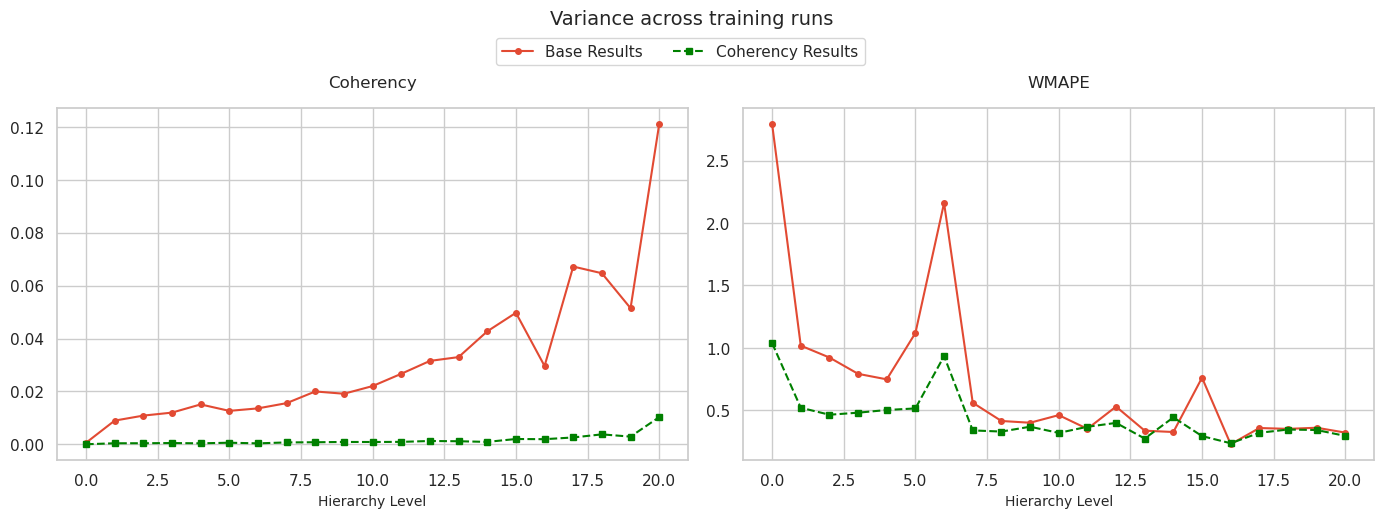

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# DROPOUT

# Set plot style
sns.set(style="whitegrid", palette="pastel")

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5.5))

# Define line styles and markers
plot_params = {
    'base': {'color': '#E24A33', 'linestyle': '-', 'marker': 'o', 'markersize': 4},
    'coherency': {'color': 'green', 'linestyle': '--', 'marker': 's', 'markersize': 4}
}

# First plot
base_line1 = ax1.plot(base_results[:, :, 0].T, **plot_params['base'])
coherency_line1 = ax1.plot(coherency_results[:, :, 0].T, **plot_params['coherency'])
ax1.set_title(names[0], fontsize=12, pad=15)
ax1.set_xlabel("Hierarchy Level", fontsize=10)
# ax1.set_ylabel("Value", fontsize=10)

# Second plot
get = 3
ax2.plot(base_results[:, :, get].T, **plot_params['base'])
ax2.plot(coherency_results[:, :, get].T, **plot_params['coherency'])
ax2.set_title(names[get], fontsize=12, pad=15)
ax2.set_xlabel("Hierarchy Level", fontsize=10)
# ax2.set_ylabel("Value", fontsize=10)

# Global adjustments
plt.suptitle("Variance across training runs", y=1.02, fontsize=14)
plt.tight_layout()

# Add legend outside the subplots
plt.legend(handles=[base_line1[0], coherency_line1[0]], labels=['Base Results', 'Coherency Results'], 
           loc='lower center', bbox_to_anchor=(-0.1, 1.1), ncol=2, frameon=True)

# Adjust the layout to make room for the legend
plt.subplots_adjust(bottom=0.2)
# plt.legend()
plt.savefig('results/{}_variance.png'.format(dataset))
# plt.show()


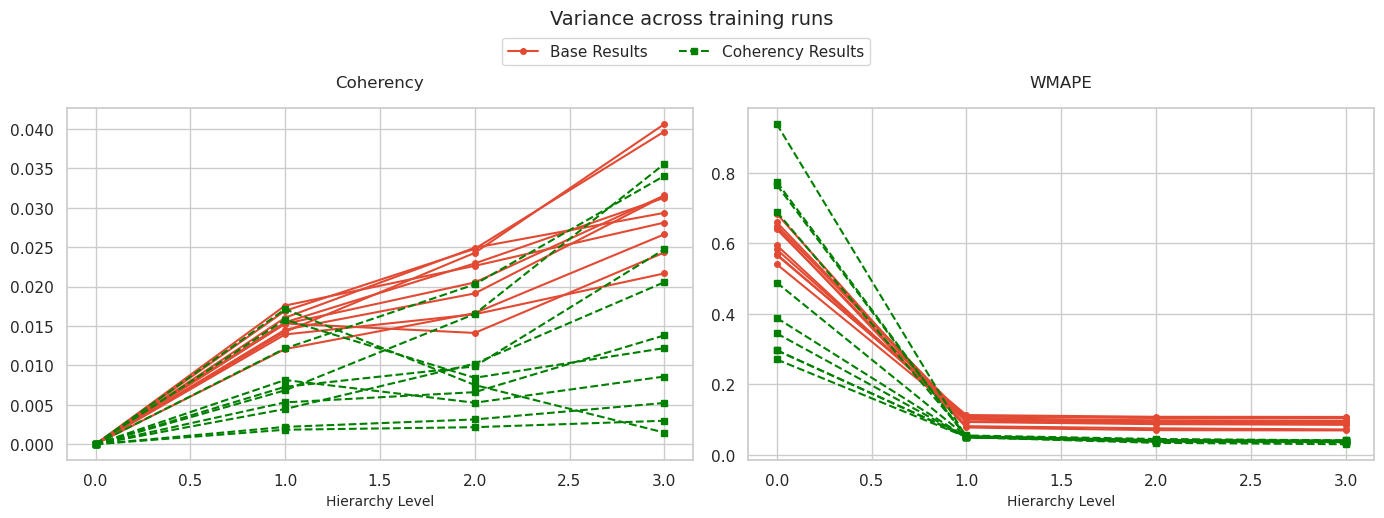

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# VAE

# Set plot style
sns.set(style="whitegrid", palette="pastel")

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5.5))

# Define line styles and markers
plot_params = {
    'base': {'color': '#E24A33', 'linestyle': '-', 'marker': 'o', 'markersize': 4},
    'coherency': {'color': 'green', 'linestyle': '--', 'marker': 's', 'markersize': 4}
}

# First plot
base_line1 = ax1.plot(base_vae_results[:, :, 0].T, **plot_params['base'])
coherency_line1 = ax1.plot(vae_results[:, :, 0].T, **plot_params['coherency'])
ax1.set_title(names[0], fontsize=12, pad=15)
ax1.set_xlabel("Hierarchy Level", fontsize=10)
# ax1.set_ylabel("Value", fontsize=10)

# Second plot
get = 3
ax2.plot(base_vae_results[:, :, get].T, **plot_params['base'])
ax2.plot(vae_results[:, :, get].T, **plot_params['coherency'])
ax2.set_title(names[get], fontsize=12, pad=15)
ax2.set_xlabel("Hierarchy Level", fontsize=10)
# ax2.set_ylabel("Value", fontsize=10)

# Global adjustments
plt.suptitle("Variance across training runs", y=1.02, fontsize=14)
plt.tight_layout()

# Add legend outside the subplots
plt.legend(handles=[base_line1[0], coherency_line1[0]], labels=['Base Results', 'Coherency Results'], 
           loc='lower center', bbox_to_anchor=(-0.1, 1.1), ncol=2, frameon=True)

# Adjust the layout to make room for the legend
plt.subplots_adjust(bottom=0.2)
# plt.legend()
plt.savefig('results/{}_variance.png'.format(dataset))
# plt.show()


In [13]:
print("DROPOUT") 
print()
for get in [1, 3, 0]:
    print(names[get])
    print("MEAN")
    print("Reg ", coherency_results[:,:,get].mean())
    print("Base", base_results[:,:,get].mean())
    
    print("STD")
    print("Reg ", coherency_results[:,:,get].std())
    print("Base", base_results[:,:,get].std())
    print()

DROPOUT

CRPS
MEAN
Reg  0.01737218469359158
Base 0.018909584420422714
STD
Reg  0.031519261873956
Base 0.031629531821011414

WMAPE
MEAN
Reg  0.43345284107185544
Base 0.7283553381760915
STD
Reg  0.1970333846305569
Base 0.6264852111920894

Coherency
MEAN
Reg  0.0016016371033141955
Base 0.03180663765219617
STD
Reg  0.0021528147960795867
Base 0.0268396695467012



In [165]:
print("VAE") 
print()

for get in [1, 3, 0]:
    print(names[get])
    print("MEAN")
    print("Reg ", vae_results[:,:,get].mean())
    print("Base", base_vae_results[:,:,get].mean())
    
    print("STD")
    print("Reg ", vae_results[:,:,get].std())
    print("Base", base_vae_results[:,:,get].std())
    print()

VAE

CRPS
MEAN
Reg  0.010412379540503025
Base 0.025078832206781955
STD
Reg  0.0072150116404641
Base 0.019093350557841216

WMAPE
MEAN
Reg  0.16371524282731115
Base 0.22331533320248126
STD
Reg  0.23898335226696707
Base 0.22649256234574533

Coherency
MEAN
Reg  0.008260502648772672
Base 0.016564989974722267
STD
Reg  0.008935544188366042
Base 0.011565385001443338



In [129]:
params = {'n_series':data.shape[1], 'hidden_dim':128, 'latent_dim':128, 'lr':1e-4, 'n_epochs':2000, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False, 'profhit':False, 'coherency_weight':1, 'project':False}
projection_results, names, projection_losses = repeat_exp(ProjectDistribution, base_agg_mat, data, params, num_runs) 

run 0


  0%|          | 3/2000 [00:00<01:30, 22.02it/s]

0.15301436185836792 0


  3%|▎         | 54/2000 [00:02<01:25, 22.72it/s]

0.10753903537988663 0


  5%|▌         | 105/2000 [00:04<01:25, 22.22it/s]

0.0836360901594162 0


  8%|▊         | 153/2000 [00:07<01:30, 20.49it/s]

0.067520372569561 0


 10%|█         | 204/2000 [00:09<01:24, 21.24it/s]

0.05620979517698288 0


 13%|█▎        | 253/2000 [00:11<01:10, 24.65it/s]

0.04636240750551224 0


 15%|█▌        | 306/2000 [00:13<00:59, 28.38it/s]

0.03895305097103119 0


 18%|█▊        | 354/2000 [00:15<01:13, 22.27it/s]

0.03648766130208969 0


 20%|██        | 402/2000 [00:17<00:53, 30.05it/s]

0.03132561966776848 0


 23%|██▎       | 454/2000 [00:19<01:07, 22.91it/s]

0.029017198830842972 0


 25%|██▌       | 502/2000 [00:22<01:12, 20.69it/s]

0.02744554728269577 0


 28%|██▊       | 554/2000 [00:24<00:59, 24.45it/s]

0.02457248605787754 0


 30%|███       | 608/2000 [00:26<00:50, 27.36it/s]

0.0225296001881361 0


 33%|███▎      | 655/2000 [00:27<00:44, 30.57it/s]

0.018757976591587067 0


 35%|███▌      | 704/2000 [00:30<00:57, 22.36it/s]

0.011805456131696701 0


 38%|███▊      | 754/2000 [00:32<00:59, 20.87it/s]

0.008944508619606495 0


 40%|████      | 805/2000 [00:35<00:52, 22.94it/s]

0.007814330980181694 0


 43%|████▎     | 853/2000 [00:37<00:56, 20.38it/s]

0.006387941539287567 0


 45%|████▌     | 904/2000 [00:39<00:47, 23.11it/s]

0.005434505641460419 0


 48%|████▊     | 955/2000 [00:41<00:44, 23.23it/s]

0.004682227503508329 0


 50%|█████     | 1004/2000 [00:43<00:47, 20.95it/s]

0.0039425999857485294 0


 53%|█████▎    | 1052/2000 [00:45<00:46, 20.43it/s]

0.0032652909867465496 0


 55%|█████▌    | 1103/2000 [00:48<00:43, 20.40it/s]

0.002874281257390976 0


 58%|█████▊    | 1154/2000 [00:50<00:42, 19.90it/s]

0.0025385646149516106 0


 60%|██████    | 1202/2000 [00:52<00:38, 20.89it/s]

0.0023448229767382145 0


 63%|██████▎   | 1252/2000 [00:54<00:28, 26.52it/s]

0.00234150979667902 0


 65%|██████▌   | 1308/2000 [00:57<00:22, 31.07it/s]

0.002157975919544697 0


 68%|██████▊   | 1353/2000 [00:59<00:29, 22.16it/s]

0.001987933414056897 0


 70%|███████   | 1403/2000 [01:01<00:30, 19.79it/s]

0.0020253860857337713 0


 73%|███████▎  | 1454/2000 [01:04<00:26, 20.91it/s]

0.0017289093229919672 0


 75%|███████▌  | 1503/2000 [01:06<00:18, 26.49it/s]

0.001593817607499659 0


 78%|███████▊  | 1555/2000 [01:08<00:17, 25.05it/s]

0.0015565297799184918 0


 80%|████████  | 1604/2000 [01:10<00:18, 21.49it/s]

0.0013962878147140145 0


 83%|████████▎ | 1654/2000 [01:13<00:15, 22.02it/s]

0.0013980887597426772 0


 85%|████████▌ | 1704/2000 [01:15<00:13, 22.49it/s]

0.0012883545132353902 0


 88%|████████▊ | 1755/2000 [01:17<00:10, 23.87it/s]

0.0011564127635210752 0


 90%|█████████ | 1803/2000 [01:19<00:08, 22.34it/s]

0.001144434092566371 0


 93%|█████████▎| 1852/2000 [01:21<00:05, 25.54it/s]

0.0010632325429469347 0


 95%|█████████▌| 1903/2000 [01:23<00:03, 28.69it/s]

0.001075258245691657 0


 98%|█████████▊| 1954/2000 [01:26<00:01, 24.21it/s]

0.000963255122769624 0


100%|██████████| 2000/2000 [01:28<00:00, 22.60it/s]


run 1


  0%|          | 3/2000 [00:00<01:13, 27.04it/s]

0.16357947885990143 0


  3%|▎         | 56/2000 [00:02<01:11, 27.14it/s]

0.11525607854127884 0


  5%|▌         | 104/2000 [00:04<01:27, 21.74it/s]

0.09234268218278885 0


  8%|▊         | 152/2000 [00:06<01:26, 21.33it/s]

0.07225639373064041 0


 10%|█         | 201/2000 [00:08<01:29, 20.08it/s]

0.05871710926294327 0


 13%|█▎        | 254/2000 [00:11<01:32, 18.89it/s]

0.04883444681763649 0


 15%|█▌        | 303/2000 [00:13<01:06, 25.51it/s]

0.04104170575737953 0


 18%|█▊        | 353/2000 [00:16<01:15, 21.69it/s]

0.03658232465386391 0


 20%|██        | 404/2000 [00:18<01:15, 21.24it/s]

0.03000502847135067 0


 23%|██▎       | 455/2000 [00:20<00:53, 29.12it/s]

0.02726864255964756 0


 25%|██▌       | 502/2000 [00:22<01:07, 22.20it/s]

0.020536033436655998 0


 28%|██▊       | 554/2000 [00:24<00:58, 24.63it/s]

0.014349633827805519 0


 30%|███       | 603/2000 [00:25<00:50, 27.61it/s]

0.010756874457001686 0


 33%|███▎      | 653/2000 [00:27<00:51, 26.19it/s]

0.008043438196182251 0


 35%|███▌      | 706/2000 [00:30<00:49, 26.06it/s]

0.006582878530025482 0


 38%|███▊      | 753/2000 [00:31<00:43, 28.78it/s]

0.005212599411606789 0


 40%|████      | 803/2000 [00:34<00:56, 21.11it/s]

0.0044149127788841724 0


 43%|████▎     | 853/2000 [00:36<00:49, 23.18it/s]

0.003984575625509024 0


 45%|████▌     | 903/2000 [00:38<00:44, 24.72it/s]

0.0035839227493852377 0


 48%|████▊     | 952/2000 [00:40<00:49, 21.09it/s]

0.0031634753104299307 0


 50%|█████     | 1001/2000 [00:42<00:32, 30.44it/s]

0.0030631159897893667 0


 53%|█████▎    | 1058/2000 [00:45<00:30, 30.58it/s]

0.0027486495673656464 0


 55%|█████▌    | 1103/2000 [00:47<00:36, 24.25it/s]

0.0025503512006253004 0


 58%|█████▊    | 1154/2000 [00:49<00:29, 28.90it/s]

0.0023342533968389034 0


 60%|██████    | 1206/2000 [00:51<00:28, 27.93it/s]

0.0020050264429301023 0


 63%|██████▎   | 1253/2000 [00:53<00:33, 22.01it/s]

0.0018670402932912111 0


 65%|██████▌   | 1304/2000 [00:55<00:32, 21.25it/s]

0.0018952839309349656 0


 68%|██████▊   | 1353/2000 [00:58<00:29, 22.15it/s]

0.001655937870964408 0


 70%|███████   | 1404/2000 [01:00<00:26, 22.72it/s]

0.0015151839470490813 0


 73%|███████▎  | 1453/2000 [01:02<00:23, 23.10it/s]

0.0013954509049654007 0


 75%|███████▌  | 1507/2000 [01:04<00:16, 29.55it/s]

0.001344251912087202 0


 78%|███████▊  | 1553/2000 [01:07<00:19, 22.42it/s]

0.0012571773258969188 0


 80%|████████  | 1603/2000 [01:09<00:17, 22.28it/s]

0.0011387425474822521 0


 83%|████████▎ | 1655/2000 [01:11<00:15, 22.44it/s]

0.0011767609976232052 0


 85%|████████▌ | 1707/2000 [01:13<00:10, 27.25it/s]

0.001065361313521862 0


 88%|████████▊ | 1754/2000 [01:15<00:11, 21.18it/s]

0.0010246190940961242 0


 90%|█████████ | 1803/2000 [01:17<00:08, 24.47it/s]

0.000951673137024045 0


 93%|█████████▎| 1854/2000 [01:20<00:06, 21.12it/s]

0.0008475612266920507 0


 95%|█████████▌| 1902/2000 [01:22<00:04, 22.02it/s]

0.0008351686410605907 0


 98%|█████████▊| 1953/2000 [01:24<00:02, 22.23it/s]

0.0007519230130128562 0


100%|██████████| 2000/2000 [01:26<00:00, 23.02it/s]


run 2


  0%|          | 4/2000 [00:00<01:02, 31.75it/s]

0.16004903614521027 0


  3%|▎         | 54/2000 [00:02<01:24, 22.92it/s]

0.1141180545091629 0


  5%|▌         | 103/2000 [00:04<01:32, 20.44it/s]

0.09003417193889618 0


  8%|▊         | 153/2000 [00:07<01:13, 25.00it/s]

0.0674239844083786 0


 10%|█         | 204/2000 [00:09<01:08, 26.18it/s]

0.05352361127734184 0


 13%|█▎        | 255/2000 [00:11<01:15, 23.10it/s]

0.042451292276382446 0


 15%|█▌        | 303/2000 [00:13<01:16, 22.06it/s]

0.03627144917845726 0


 18%|█▊        | 353/2000 [00:16<01:16, 21.65it/s]

0.03234706073999405 0


 20%|██        | 404/2000 [00:18<01:05, 24.18it/s]

0.02768288180232048 0


 23%|██▎       | 453/2000 [00:20<01:06, 23.31it/s]

0.025134459137916565 0


 25%|██▌       | 503/2000 [00:22<01:02, 24.02it/s]

0.019113605841994286 0


 28%|██▊       | 555/2000 [00:24<01:01, 23.58it/s]

0.013185613788664341 0


 30%|███       | 604/2000 [00:26<00:56, 24.73it/s]

0.008958839811384678 0


 33%|███▎      | 653/2000 [00:28<00:59, 22.72it/s]

0.006320059299468994 0


 35%|███▌      | 702/2000 [00:30<00:56, 22.97it/s]

0.0052532535046339035 0


 38%|███▊      | 757/2000 [00:32<00:42, 29.02it/s]

0.004371467512100935 0


 40%|████      | 803/2000 [00:34<00:55, 21.48it/s]

0.003712365170940757 0


 43%|████▎     | 855/2000 [00:37<00:48, 23.49it/s]

0.003607839113101363 0


 45%|████▌     | 902/2000 [00:39<01:01, 17.91it/s]

0.0031076783780008554 0


 48%|████▊     | 952/2000 [00:42<01:03, 16.40it/s]

0.0029529994353652 0


 50%|█████     | 1002/2000 [00:45<00:45, 22.08it/s]

0.0025393026880919933 0


 53%|█████▎    | 1052/2000 [00:47<00:44, 21.10it/s]

0.002523494651541114 0


 55%|█████▌    | 1103/2000 [00:49<00:41, 21.72it/s]

0.0021639326587319374 0


 58%|█████▊    | 1156/2000 [00:52<00:37, 22.58it/s]

0.0021062924060970545 0


 60%|██████    | 1204/2000 [00:54<00:36, 22.10it/s]

0.001898139133118093 0


 63%|██████▎   | 1254/2000 [00:56<00:32, 23.09it/s]

0.0018340046517550945 0


 65%|██████▌   | 1305/2000 [00:58<00:31, 22.36it/s]

0.0017905638087540865 0


 68%|██████▊   | 1353/2000 [01:00<00:30, 20.90it/s]

0.00156574253924191 0


 70%|███████   | 1402/2000 [01:03<00:32, 18.26it/s]

0.0014857699861750007 0


 73%|███████▎  | 1452/2000 [01:06<00:34, 16.02it/s]

0.0014253150438889861 0


 75%|███████▌  | 1503/2000 [01:09<00:27, 18.29it/s]

0.0013439980102702975 0


 78%|███████▊  | 1557/2000 [01:11<00:14, 30.38it/s]

0.0013024117797613144 0


 80%|████████  | 1604/2000 [01:13<00:18, 21.66it/s]

0.0011930750915780663 0


 83%|████████▎ | 1652/2000 [01:15<00:19, 17.72it/s]

0.0011389311403036118 0


 85%|████████▌ | 1704/2000 [01:18<00:15, 18.78it/s]

0.0010826262878254056 0


 88%|████████▊ | 1753/2000 [01:21<00:15, 16.42it/s]

0.001012215856462717 0


 90%|█████████ | 1805/2000 [01:24<00:09, 20.11it/s]

0.0009764231508597732 0


 93%|█████████▎| 1853/2000 [01:26<00:08, 17.92it/s]

0.0009135932195931673 0


 95%|█████████▌| 1903/2000 [01:28<00:03, 27.49it/s]

0.0009175154264084995 0


 98%|█████████▊| 1955/2000 [01:30<00:02, 22.00it/s]

0.0008546452154405415 0


100%|██████████| 2000/2000 [01:32<00:00, 21.57it/s]


run 3


  0%|          | 4/2000 [00:00<00:50, 39.16it/s]

0.16405627131462097 0


  3%|▎         | 54/2000 [00:02<01:27, 22.16it/s]

0.11556404829025269 0


  5%|▌         | 105/2000 [00:04<01:24, 22.33it/s]

0.09154549241065979 0


  8%|▊         | 153/2000 [00:07<01:26, 21.36it/s]

0.07100115716457367 0


 10%|█         | 203/2000 [00:09<01:18, 23.01it/s]

0.056775353848934174 0


 13%|█▎        | 252/2000 [00:11<01:18, 22.13it/s]

0.04690997675061226 0


 15%|█▌        | 304/2000 [00:14<01:07, 25.23it/s]

0.04036680981516838 0


 18%|█▊        | 353/2000 [00:16<01:04, 25.39it/s]

0.034349992871284485 0


 20%|██        | 405/2000 [00:18<01:12, 21.97it/s]

0.032055169343948364 0


 23%|██▎       | 453/2000 [00:20<01:11, 21.59it/s]

0.02880726382136345 0


 25%|██▌       | 503/2000 [00:22<01:08, 21.88it/s]

0.024735288694500923 0


 28%|██▊       | 554/2000 [00:25<01:02, 23.00it/s]

0.023823387920856476 0


 30%|███       | 602/2000 [00:27<01:11, 19.50it/s]

0.021258065477013588 0


 33%|███▎      | 654/2000 [00:30<01:04, 20.92it/s]

0.018594346940517426 0


 35%|███▌      | 703/2000 [00:32<00:58, 22.13it/s]

0.015887485817074776 0


 38%|███▊      | 754/2000 [00:34<00:51, 24.34it/s]

0.011041681282222271 0


 40%|████      | 802/2000 [00:36<00:57, 21.00it/s]

0.008728479966521263 0


 43%|████▎     | 853/2000 [00:38<00:56, 20.13it/s]

0.007528220769017935 0


 45%|████▌     | 902/2000 [00:41<00:49, 22.09it/s]

0.006533917039632797 0


 48%|████▊     | 954/2000 [00:43<00:46, 22.65it/s]

0.0059355758130550385 0


 50%|█████     | 1002/2000 [00:45<00:44, 22.23it/s]

0.005052738822996616 0


 53%|█████▎    | 1054/2000 [00:48<00:40, 23.52it/s]

0.004288106691092253 0


 55%|█████▌    | 1102/2000 [00:50<00:38, 23.35it/s]

0.003762401407584548 0


 58%|█████▊    | 1153/2000 [00:52<00:38, 21.99it/s]

0.003231255104765296 0


 60%|██████    | 1204/2000 [00:55<00:38, 20.88it/s]

0.0028219837695360184 0


 63%|██████▎   | 1252/2000 [00:57<00:34, 21.75it/s]

0.002571330638602376 0


 65%|██████▌   | 1303/2000 [00:59<00:32, 21.69it/s]

0.0022881224285811186 0


 68%|██████▊   | 1354/2000 [01:02<00:30, 21.35it/s]

0.002014071913436055 0


 70%|███████   | 1403/2000 [01:04<00:27, 21.58it/s]

0.0017532287165522575 0


 73%|███████▎  | 1454/2000 [01:06<00:25, 21.51it/s]

0.0016650252509862185 0


 75%|███████▌  | 1502/2000 [01:08<00:24, 20.28it/s]

0.001545452163554728 0


 78%|███████▊  | 1555/2000 [01:11<00:20, 21.40it/s]

0.0014499262906610966 0


 80%|████████  | 1604/2000 [01:13<00:18, 21.59it/s]

0.0012645096285268664 0


 83%|████████▎ | 1652/2000 [01:15<00:17, 20.14it/s]

0.0011998083209618926 0


 85%|████████▌ | 1703/2000 [01:18<00:13, 21.91it/s]

0.0011447679717093706 0


 88%|████████▊ | 1755/2000 [01:20<00:11, 21.26it/s]

0.0010854111751541495 0


 90%|█████████ | 1803/2000 [01:22<00:09, 20.32it/s]

0.0009911799570545554 0


 93%|█████████▎| 1854/2000 [01:25<00:06, 20.99it/s]

0.0009561700862832367 0


 95%|█████████▌| 1905/2000 [01:27<00:04, 22.40it/s]

0.0008607356576249003 0


 98%|█████████▊| 1953/2000 [01:29<00:02, 21.04it/s]

0.0008174059330485761 0


100%|██████████| 2000/2000 [01:32<00:00, 21.70it/s]


run 4


  0%|          | 3/2000 [00:00<01:19, 24.96it/s]

0.1573018878698349 0


  3%|▎         | 54/2000 [00:02<01:25, 22.84it/s]

0.10512202233076096 0


  5%|▌         | 102/2000 [00:04<01:25, 22.30it/s]

0.08057453483343124 0


  8%|▊         | 152/2000 [00:06<01:14, 24.86it/s]

0.0629228800535202 0


 10%|█         | 206/2000 [00:08<01:10, 25.45it/s]

0.04969080537557602 0


 13%|█▎        | 255/2000 [00:10<01:18, 22.13it/s]

0.04118455946445465 0


 15%|█▌        | 302/2000 [00:12<01:13, 23.06it/s]

0.03571173548698425 0


 18%|█▊        | 355/2000 [00:15<01:13, 22.29it/s]

0.032504014670848846 0


 20%|██        | 403/2000 [00:18<01:55, 13.79it/s]

0.02898699976503849 0


 23%|██▎       | 454/2000 [00:20<01:06, 23.37it/s]

0.02697157859802246 0


 25%|██▌       | 502/2000 [00:22<01:12, 20.63it/s]

0.024315284565091133 0


 28%|██▊       | 553/2000 [00:25<01:09, 20.84it/s]

0.022498540580272675 0


 30%|███       | 603/2000 [00:27<01:16, 18.36it/s]

0.0194869264960289 0


 33%|███▎      | 652/2000 [00:30<01:18, 17.07it/s]

0.018033107742667198 0


 35%|███▌      | 704/2000 [00:32<01:01, 20.97it/s]

0.015462283976376057 0


 38%|███▊      | 753/2000 [00:34<00:56, 21.92it/s]

0.011263898573815823 0


 40%|████      | 803/2000 [00:36<00:50, 23.64it/s]

0.007718854583799839 0


 43%|████▎     | 854/2000 [00:39<00:51, 22.08it/s]

0.005946360994130373 0


 45%|████▌     | 905/2000 [00:41<00:50, 21.70it/s]

0.005368226673454046 0


 48%|████▊     | 952/2000 [00:43<00:46, 22.34it/s]

0.004269133321940899 0


 50%|█████     | 1003/2000 [00:46<00:50, 19.66it/s]

0.0036755939945578575 0


 53%|█████▎    | 1054/2000 [00:48<00:49, 18.96it/s]

0.002958837430924177 0


 55%|█████▌    | 1104/2000 [00:51<00:41, 21.38it/s]

0.002604500623419881 0


 58%|█████▊    | 1152/2000 [00:53<00:40, 21.15it/s]

0.002263892674818635 0


 60%|██████    | 1203/2000 [00:55<00:38, 20.63it/s]

0.001983656082302332 0


 63%|██████▎   | 1254/2000 [00:58<00:33, 22.27it/s]

0.001819327473640442 0


 65%|██████▌   | 1303/2000 [01:00<00:33, 20.82it/s]

0.0016140076331794262 0


 68%|██████▊   | 1352/2000 [01:02<00:32, 20.22it/s]

0.001452336902730167 0


 70%|███████   | 1405/2000 [01:04<00:21, 27.94it/s]

0.0013482029316946864 0


 73%|███████▎  | 1453/2000 [01:06<00:19, 28.53it/s]

0.0012343169655650854 0


 75%|███████▌  | 1505/2000 [01:08<00:21, 23.28it/s]

0.0011755366576835513 0


 78%|███████▊  | 1555/2000 [01:10<00:15, 29.14it/s]

0.001064974581822753 0


 80%|████████  | 1604/2000 [01:12<00:19, 20.72it/s]

0.0009763677953742445 0


 83%|████████▎ | 1655/2000 [01:14<00:15, 22.88it/s]

0.0009538562153466046 0


 85%|████████▌ | 1702/2000 [01:16<00:15, 19.30it/s]

0.0008275382569991052 0


 88%|████████▊ | 1752/2000 [01:18<00:11, 22.50it/s]

0.0007812828407622874 0


 90%|█████████ | 1802/2000 [01:20<00:07, 26.88it/s]

0.0007107181590981781 0


 93%|█████████▎| 1854/2000 [01:23<00:06, 21.66it/s]

0.0006727127474732697 0


 95%|█████████▌| 1903/2000 [01:25<00:04, 21.87it/s]

0.0006425560568459332 0


 98%|█████████▊| 1954/2000 [01:28<00:02, 22.60it/s]

0.0006057214923202991 0


100%|██████████| 2000/2000 [01:29<00:00, 22.24it/s]


run 5


  0%|          | 4/2000 [00:00<01:04, 30.86it/s]

0.166692316532135 0


  3%|▎         | 53/2000 [00:02<01:20, 24.08it/s]

0.11745736747980118 0


  5%|▌         | 104/2000 [00:04<01:29, 21.21it/s]

0.0922207161784172 0


  8%|▊         | 153/2000 [00:06<01:25, 21.54it/s]

0.07365301251411438 0


 10%|█         | 204/2000 [00:09<01:31, 19.61it/s]

0.06146721541881561 0


 13%|█▎        | 252/2000 [00:11<01:25, 20.36it/s]

0.04835057258605957 0


 15%|█▌        | 305/2000 [00:13<01:03, 26.61it/s]

0.04290547966957092 0


 18%|█▊        | 352/2000 [00:15<01:15, 21.93it/s]

0.03626517206430435 0


 20%|██        | 403/2000 [00:17<01:21, 19.63it/s]

0.03298265114426613 0


 23%|██▎       | 453/2000 [00:20<01:12, 21.33it/s]

0.030019095167517662 0


 25%|██▌       | 504/2000 [00:22<01:08, 21.71it/s]

0.027025843039155006 0


 28%|██▊       | 552/2000 [00:24<01:03, 22.68it/s]

0.023280899971723557 0


 30%|███       | 602/2000 [00:26<00:55, 25.27it/s]

0.02279876172542572 0


 33%|███▎      | 652/2000 [00:29<01:02, 21.61it/s]

0.01947302743792534 0


 35%|███▌      | 709/2000 [00:31<00:39, 32.52it/s]

0.01656825840473175 0


 38%|███▊      | 754/2000 [00:33<00:59, 21.00it/s]

0.011510435491800308 0


 40%|████      | 802/2000 [00:35<00:52, 22.71it/s]

0.009126761928200722 0


 43%|████▎     | 853/2000 [00:37<00:53, 21.26it/s]

0.007877872325479984 0


 45%|████▌     | 904/2000 [00:40<00:49, 21.97it/s]

0.006107907276600599 0


 48%|████▊     | 953/2000 [00:42<01:03, 16.49it/s]

0.005441045388579369 0


 50%|█████     | 1004/2000 [00:45<00:45, 21.76it/s]

0.004361267667263746 0


 53%|█████▎    | 1055/2000 [00:47<00:43, 21.90it/s]

0.003618936287239194 0


 55%|█████▌    | 1103/2000 [00:49<00:42, 21.22it/s]

0.0028783681336790323 0


 58%|█████▊    | 1154/2000 [00:52<00:36, 23.22it/s]

0.002592335222288966 0


 60%|██████    | 1202/2000 [00:54<00:34, 23.02it/s]

0.002255669329315424 0


 63%|██████▎   | 1252/2000 [00:56<00:30, 24.66it/s]

0.0020143967121839523 0


 65%|██████▌   | 1303/2000 [00:58<00:31, 21.81it/s]

0.0019330806098878384 0


 68%|██████▊   | 1354/2000 [01:00<00:30, 21.20it/s]

0.001679896260611713 0


 70%|███████   | 1405/2000 [01:03<00:26, 22.52it/s]

0.0014828798593953252 0


 73%|███████▎  | 1453/2000 [01:05<00:23, 23.52it/s]

0.0013276803074404597 0


 75%|███████▌  | 1504/2000 [01:07<00:22, 22.30it/s]

0.001218331279233098 0


 78%|███████▊  | 1552/2000 [01:09<00:20, 21.47it/s]

0.0010655183577910066 0


 80%|████████  | 1602/2000 [01:12<00:18, 22.07it/s]

0.0009239292703568935 0


 83%|████████▎ | 1653/2000 [01:14<00:15, 22.17it/s]

0.0008530703489668667 0


 85%|████████▌ | 1704/2000 [01:16<00:13, 21.80it/s]

0.0007048701518215239 0


 88%|████████▊ | 1754/2000 [01:19<00:11, 20.75it/s]

0.000675056828185916 0


 90%|█████████ | 1802/2000 [01:21<00:09, 20.28it/s]

0.000570382340811193 0


 93%|█████████▎| 1855/2000 [01:24<00:06, 23.06it/s]

0.0005101457936689258 0


 95%|█████████▌| 1902/2000 [01:26<00:04, 21.41it/s]

0.00048266962403431535 0


 98%|█████████▊| 1953/2000 [01:28<00:02, 22.17it/s]

0.00042423332342877984 0


100%|██████████| 2000/2000 [01:30<00:00, 21.98it/s]


run 6


  0%|          | 4/2000 [00:00<00:56, 35.20it/s]

0.1544046401977539 0


  3%|▎         | 54/2000 [00:02<01:34, 20.70it/s]

0.10360891371965408 0


  5%|▌         | 105/2000 [00:04<01:26, 21.94it/s]

0.08089122921228409 0


  8%|▊         | 153/2000 [00:07<01:25, 21.53it/s]

0.06372909247875214 0


 10%|█         | 204/2000 [00:09<01:22, 21.72it/s]

0.053049664944410324 0


 13%|█▎        | 252/2000 [00:11<01:24, 20.77it/s]

0.043715670704841614 0


 15%|█▌        | 303/2000 [00:14<01:24, 20.12it/s]

0.038022447377443314 0


 18%|█▊        | 354/2000 [00:16<01:15, 21.72it/s]

0.032346390187740326 0


 20%|██        | 402/2000 [00:18<01:12, 22.14it/s]

0.030036143958568573 0


 23%|██▎       | 454/2000 [00:20<01:02, 24.73it/s]

0.025165004655718803 0


 25%|██▌       | 505/2000 [00:22<01:06, 22.41it/s]

0.018688980489969254 0


 28%|██▊       | 553/2000 [00:25<01:10, 20.64it/s]

0.013708834536373615 0


 30%|███       | 604/2000 [00:27<00:58, 24.01it/s]

0.010811050422489643 0


 33%|███▎      | 655/2000 [00:29<01:00, 22.27it/s]

0.00805182196199894 0


 35%|███▌      | 703/2000 [00:31<01:01, 20.98it/s]

0.006242208182811737 0


 38%|███▊      | 754/2000 [00:34<00:52, 23.67it/s]

0.005028246436268091 0


 40%|████      | 804/2000 [00:36<00:45, 26.48it/s]

0.004055345430970192 0


 43%|████▎     | 853/2000 [00:38<00:49, 23.26it/s]

0.0035202237777411938 0


 45%|████▌     | 904/2000 [00:40<00:53, 20.45it/s]

0.003312795190140605 0


 48%|████▊     | 952/2000 [00:43<00:50, 20.66it/s]

0.002862838562577963 0


 50%|█████     | 1004/2000 [00:45<00:46, 21.39it/s]

0.0026734177954494953 0


 53%|█████▎    | 1055/2000 [00:47<00:40, 23.30it/s]

0.0024237476754933596 0


 55%|█████▌    | 1104/2000 [00:49<00:36, 24.81it/s]

0.00217562192119658 0


 58%|█████▊    | 1154/2000 [00:51<00:38, 22.09it/s]

0.0020433664321899414 0


 60%|██████    | 1205/2000 [00:54<00:35, 22.46it/s]

0.0018954527331516147 0


 63%|██████▎   | 1253/2000 [00:56<00:35, 21.14it/s]

0.0017030949238687754 0


 65%|██████▌   | 1305/2000 [00:58<00:29, 23.42it/s]

0.001709962380118668 0


 68%|██████▊   | 1353/2000 [01:00<00:29, 21.77it/s]

0.001500473590567708 0


 70%|███████   | 1403/2000 [01:02<00:26, 22.67it/s]

0.0013891421258449554 0


 73%|███████▎  | 1457/2000 [01:04<00:19, 27.81it/s]

0.0013212125049903989 0


 75%|███████▌  | 1503/2000 [01:07<00:24, 19.94it/s]

0.0012453083181753755 0


 78%|███████▊  | 1555/2000 [01:09<00:16, 26.65it/s]

0.0011550555936992168 0


 80%|████████  | 1604/2000 [01:11<00:17, 22.16it/s]

0.0010768527863547206 0


 83%|████████▎ | 1654/2000 [01:13<00:15, 22.53it/s]

0.001015731249935925 0


 85%|████████▌ | 1705/2000 [01:15<00:12, 23.28it/s]

0.0009599141194485128 0


 88%|████████▊ | 1754/2000 [01:17<00:09, 26.46it/s]

0.000938566168770194 0


 90%|█████████ | 1804/2000 [01:19<00:08, 23.83it/s]

0.0008966451277956367 0


 93%|█████████▎| 1853/2000 [01:21<00:06, 23.87it/s]

0.0007171807810664177 0


 95%|█████████▌| 1904/2000 [01:23<00:04, 22.25it/s]

0.0007679885602556169 0


 98%|█████████▊| 1955/2000 [01:26<00:02, 22.23it/s]

0.0007352816755883396 0


100%|██████████| 2000/2000 [01:28<00:00, 22.60it/s]


run 7


  0%|          | 3/2000 [00:00<01:18, 25.55it/s]

0.15915191173553467 0


  3%|▎         | 54/2000 [00:02<01:43, 18.77it/s]

0.11084631830453873 0


  5%|▌         | 101/2000 [00:05<01:34, 20.15it/s]

0.09415016323328018 0


  8%|▊         | 153/2000 [00:08<01:16, 24.12it/s]

0.07513490319252014 0


 10%|█         | 202/2000 [00:10<01:20, 22.42it/s]

0.061603836715221405 0


 13%|█▎        | 254/2000 [00:12<01:31, 19.01it/s]

0.05269456282258034 0


 15%|█▌        | 304/2000 [00:15<01:25, 19.77it/s]

0.04379218444228172 0


 18%|█▊        | 352/2000 [00:17<01:21, 20.16it/s]

0.03891902044415474 0


 20%|██        | 405/2000 [00:19<00:58, 27.18it/s]

0.034294016659259796 0


 23%|██▎       | 454/2000 [00:21<01:03, 24.35it/s]

0.03092946670949459 0


 25%|██▌       | 503/2000 [00:23<01:03, 23.45it/s]

0.028620734810829163 0


 28%|██▊       | 554/2000 [00:26<01:06, 21.87it/s]

0.024161668494343758 0


 30%|███       | 604/2000 [00:28<01:04, 21.78it/s]

0.021154804155230522 0


 33%|███▎      | 654/2000 [00:30<00:59, 22.69it/s]

0.01649625599384308 0


 35%|███▌      | 703/2000 [00:33<01:04, 20.07it/s]

0.01267913356423378 0


 38%|███▊      | 754/2000 [00:35<00:58, 21.31it/s]

0.011201035231351852 0


 40%|████      | 802/2000 [00:37<00:53, 22.30it/s]

0.009534326381981373 0


 43%|████▎     | 852/2000 [00:39<00:39, 29.42it/s]

0.008253108710050583 0


 45%|████▌     | 902/2000 [00:41<00:47, 23.14it/s]

0.006750825326889753 0


 48%|████▊     | 953/2000 [00:43<00:38, 26.90it/s]

0.00580515107139945 0


 50%|█████     | 1004/2000 [00:45<00:45, 22.08it/s]

0.0049189734272658825 0


 53%|█████▎    | 1056/2000 [00:48<00:39, 23.87it/s]

0.00435511814430356 0


 55%|█████▌    | 1104/2000 [00:50<00:42, 21.13it/s]

0.00409902585670352 0


 58%|█████▊    | 1153/2000 [00:52<00:28, 29.25it/s]

0.003890394698828459 0


 60%|██████    | 1205/2000 [00:54<00:36, 21.90it/s]

0.0036083438899368048 0


 63%|██████▎   | 1254/2000 [00:56<00:31, 23.92it/s]

0.003095056628808379 0


 65%|██████▌   | 1303/2000 [00:58<00:31, 22.03it/s]

0.003394646802917123 0


 68%|██████▊   | 1354/2000 [01:01<00:30, 21.16it/s]

0.0028682886622846127 0


 70%|███████   | 1405/2000 [01:03<00:24, 24.14it/s]

0.0027257928159087896 0


 73%|███████▎  | 1453/2000 [01:05<00:25, 21.43it/s]

0.002703086705878377 0


 75%|███████▌  | 1504/2000 [01:07<00:23, 21.51it/s]

0.0023743307683616877 0


 78%|███████▊  | 1552/2000 [01:10<00:21, 21.10it/s]

0.0023366683162748814 0


 80%|████████  | 1603/2000 [01:12<00:18, 21.44it/s]

0.002197783440351486 0


 83%|████████▎ | 1654/2000 [01:14<00:15, 22.16it/s]

0.0022475277073681355 0


 85%|████████▌ | 1705/2000 [01:17<00:13, 21.59it/s]

0.0020042387768626213 0


 88%|████████▊ | 1752/2000 [01:19<00:12, 19.86it/s]

0.0018952387617900968 0


 90%|█████████ | 1803/2000 [01:21<00:08, 21.98it/s]

0.0016046356176957488 0


 93%|█████████▎| 1854/2000 [01:24<00:06, 22.28it/s]

0.0017433491302654147 0


 95%|█████████▌| 1902/2000 [01:26<00:04, 21.13it/s]

0.0015241311630234122 0


 98%|█████████▊| 1952/2000 [01:28<00:02, 22.25it/s]

0.0016298112459480762 0


100%|██████████| 2000/2000 [01:30<00:00, 22.07it/s]


run 8


  0%|          | 3/2000 [00:00<01:20, 24.67it/s]

0.163194477558136 0


  3%|▎         | 54/2000 [00:02<02:04, 15.62it/s]

0.11079611629247665 0


  5%|▌         | 102/2000 [00:05<01:33, 20.40it/s]

0.08248598873615265 0


  8%|▊         | 152/2000 [00:07<01:42, 18.00it/s]

0.0641898438334465 0


 10%|█         | 203/2000 [00:10<01:44, 17.12it/s]

0.05042518675327301 0


 13%|█▎        | 254/2000 [00:13<01:08, 25.50it/s]

0.04277794063091278 0


 15%|█▌        | 304/2000 [00:15<01:18, 21.73it/s]

0.03775687515735626 0


 18%|█▊        | 354/2000 [00:18<01:15, 21.79it/s]

0.03227612376213074 0


 20%|██        | 403/2000 [00:20<01:36, 16.54it/s]

0.028508320450782776 0


 23%|██▎       | 454/2000 [00:23<01:01, 25.17it/s]

0.027108335867524147 0


 25%|██▌       | 506/2000 [00:25<00:53, 28.19it/s]

0.023451723158359528 0


 28%|██▊       | 557/2000 [00:28<00:50, 28.39it/s]

0.02211548574268818 0


 30%|███       | 605/2000 [00:29<00:40, 34.45it/s]

0.02086601033806801 0


 33%|███▎      | 655/2000 [00:30<00:40, 32.98it/s]

0.018592270091176033 0


 35%|███▌      | 705/2000 [00:32<00:37, 34.87it/s]

0.01740516908466816 0


 38%|███▊      | 753/2000 [00:34<00:53, 23.43it/s]

0.016402458772063255 0


 40%|████      | 805/2000 [00:36<00:36, 32.94it/s]

0.014491920359432697 0


 43%|████▎     | 853/2000 [00:38<00:56, 20.42it/s]

0.013480505906045437 0


 45%|████▌     | 902/2000 [00:40<00:45, 23.90it/s]

0.011990760453045368 0


 48%|████▊     | 953/2000 [00:43<00:52, 20.03it/s]

0.010999839752912521 0


 50%|█████     | 1003/2000 [00:45<00:50, 19.77it/s]

0.008412939496338367 0


 53%|█████▎    | 1053/2000 [00:48<00:45, 21.00it/s]

0.007224688306450844 0


 55%|█████▌    | 1103/2000 [00:50<00:38, 23.47it/s]

0.005552316550165415 0


 58%|█████▊    | 1153/2000 [00:52<00:40, 21.01it/s]

0.004129041917622089 0


 60%|██████    | 1203/2000 [00:54<00:32, 24.17it/s]

0.002998385112732649 0


 63%|██████▎   | 1253/2000 [00:56<00:32, 22.78it/s]

0.0021515688858926296 0


 65%|██████▌   | 1302/2000 [00:58<00:34, 20.39it/s]

0.0013704157900065184 0


 68%|██████▊   | 1353/2000 [01:00<00:31, 20.52it/s]

0.0008953058859333396 0


 70%|███████   | 1405/2000 [01:02<00:25, 23.64it/s]

0.0006678376812487841 0


 73%|███████▎  | 1453/2000 [01:05<00:25, 21.70it/s]

0.0005327645922079682 0


 75%|███████▌  | 1504/2000 [01:07<00:24, 20.48it/s]

0.00045079676783643663 0


 78%|███████▊  | 1555/2000 [01:09<00:18, 23.48it/s]

0.0003640044014900923 0


 80%|████████  | 1603/2000 [01:11<00:19, 20.30it/s]

0.00033638920285739005 0


 83%|████████▎ | 1654/2000 [01:14<00:16, 21.19it/s]

0.00032269093208014965 0


 85%|████████▌ | 1704/2000 [01:16<00:14, 20.88it/s]

0.0002651175600476563 0


 88%|████████▊ | 1752/2000 [01:18<00:11, 21.24it/s]

0.0002493946230970323 0


 90%|█████████ | 1803/2000 [01:21<00:08, 22.80it/s]

0.00022898675524629653 0


 93%|█████████▎| 1854/2000 [01:23<00:06, 21.75it/s]

0.00020962614507880062 0


 95%|█████████▌| 1904/2000 [01:25<00:04, 19.84it/s]

0.00021948243374936283 0


 98%|█████████▊| 1953/2000 [01:28<00:02, 21.50it/s]

0.0001851247070590034 0


100%|██████████| 2000/2000 [01:30<00:00, 22.07it/s]


run 9


  0%|          | 3/2000 [00:00<01:14, 26.68it/s]

0.15976482629776 0


  3%|▎         | 54/2000 [00:02<01:34, 20.63it/s]

0.10867124050855637 0


  5%|▌         | 103/2000 [00:04<01:21, 23.20it/s]

0.08600571751594543 0


  8%|▊         | 155/2000 [00:06<01:22, 22.33it/s]

0.06665991991758347 0


 10%|█         | 203/2000 [00:09<01:23, 21.49it/s]

0.05518193170428276 0


 13%|█▎        | 254/2000 [00:11<01:23, 20.80it/s]

0.04598230496048927 0


 15%|█▌        | 304/2000 [00:13<01:00, 27.94it/s]

0.03947484865784645 0


 18%|█▊        | 352/2000 [00:15<01:06, 24.87it/s]

0.034914515912532806 0


 20%|██        | 403/2000 [00:17<01:17, 20.64it/s]

0.030943788588047028 0


 23%|██▎       | 455/2000 [00:20<01:08, 22.45it/s]

0.028622664511203766 0


 25%|██▌       | 502/2000 [00:22<00:57, 26.19it/s]

0.026923079043626785 0


 28%|██▊       | 554/2000 [00:24<01:05, 21.93it/s]

0.024062244221568108 0


 30%|███       | 605/2000 [00:27<01:29, 15.63it/s]

0.02234901487827301 0


 33%|███▎      | 654/2000 [00:29<01:01, 22.01it/s]

0.021222857758402824 0


 35%|███▌      | 705/2000 [00:31<00:58, 22.14it/s]

0.018872205168008804 0


 38%|███▊      | 754/2000 [00:34<00:57, 21.49it/s]

0.0177998598664999 0


 40%|████      | 802/2000 [00:36<00:55, 21.69it/s]

0.017018206417560577 0


 43%|████▎     | 853/2000 [00:38<00:49, 23.20it/s]

0.014649628661572933 0


 45%|████▌     | 903/2000 [00:40<00:52, 20.90it/s]

0.013037166558206081 0


 48%|████▊     | 954/2000 [00:42<00:48, 21.40it/s]

0.011477421037852764 0


 50%|█████     | 1003/2000 [00:45<00:45, 21.77it/s]

0.008994371630251408 0


 53%|█████▎    | 1053/2000 [00:47<00:42, 22.55it/s]

0.006688432302325964 0


 55%|█████▌    | 1104/2000 [00:49<00:41, 21.72it/s]

0.004231900442391634 0


 58%|█████▊    | 1154/2000 [00:51<00:38, 21.94it/s]

0.002350002061575651 0


 60%|██████    | 1205/2000 [00:53<00:30, 26.48it/s]

0.001437932951375842 0


 63%|██████▎   | 1253/2000 [00:56<00:35, 21.31it/s]

0.0010403497144579887 0


 65%|██████▌   | 1305/2000 [00:59<00:35, 19.60it/s]

0.0008254785789176822 0


 68%|██████▊   | 1353/2000 [01:02<00:36, 17.85it/s]

0.0007219735416583717 0


 70%|███████   | 1403/2000 [01:04<00:26, 22.20it/s]

0.0006050061783753335 0


 73%|███████▎  | 1454/2000 [01:07<00:24, 21.88it/s]

0.0005465795984491706 0


 75%|███████▌  | 1502/2000 [01:09<00:23, 21.55it/s]

0.0005072218482382596 0


 78%|███████▊  | 1553/2000 [01:11<00:20, 21.77it/s]

0.0004800119495484978 0


 80%|████████  | 1602/2000 [01:14<00:18, 21.50it/s]

0.0004402896447572857 0


 83%|████████▎ | 1653/2000 [01:16<00:15, 22.42it/s]

0.0003670022706501186 0


 85%|████████▌ | 1704/2000 [01:18<00:14, 20.68it/s]

0.00037847735802643 0


 88%|████████▊ | 1755/2000 [01:21<00:11, 21.90it/s]

0.0003223340318072587 0


 90%|█████████ | 1804/2000 [01:23<00:08, 24.39it/s]

0.0003497360448818654 0


 93%|█████████▎| 1853/2000 [01:25<00:06, 24.47it/s]

0.00030349259031936526 0


 95%|█████████▌| 1905/2000 [01:28<00:04, 22.13it/s]

0.0003132690617348999 0


 98%|█████████▊| 1953/2000 [01:30<00:02, 21.11it/s]

0.00026859124773181975 0


100%|██████████| 2000/2000 [01:32<00:00, 21.60it/s]


In [203]:
from Experiments import JSDDistribution 

all_jsd = []
# jsd_weights = np.arange(5e-4, 6e-3, 2e-4)
jsd_weights = [1e-3, 3e-3, 5e-3, 7e-3]
# jsd_weights = [1e-3]
for w in jsd_weights:
    params = {'n_series':data.shape[1], 'hidden_dim':128, 'latent_dim':128, 'lr':1e-4, 'n_epochs':2000, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
              'coherency_loss':False, 'profhit':False, 'coherency_weight':w, 'project':False, 'jsd':True}

    jsd_results_2, names, jsd_losses = repeat_exp(JSDDistribution, base_agg_mat, data, params, 1) 
    jsd_results_2 = jsd_results_2[~np.isnan(jsd_results_2)].reshape(-1, jsd_results_2.shape[1], 4)
    
    all_jsd.append(jsd_results_2)

run 0


  0%|          | 0/2000 [00:00<?, ?it/s]/home/jovyan/Rares/time_series/kdd/coherency.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_means = torch.tensor(torch.mean(data, dim=0), device=device).float()
/home/jovyan/Rares/time_series/kdd/coherency.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_std = torch.tensor(torch.std(data, dim=0), device=device).float()
  0%|          | 3/2000 [00:00<01:21, 24.38it/s]

0.2702091336250305 2.8837993144989014


  3%|▎         | 54/2000 [00:02<01:31, 21.30it/s]

0.1791660636663437 3.270900011062622


  5%|▌         | 106/2000 [00:04<01:13, 25.77it/s]

0.05116335675120354 41.978641510009766


  8%|▊         | 153/2000 [00:07<01:36, 19.07it/s]

0.0053374506533145905 321.08160400390625


 10%|█         | 203/2000 [00:09<01:34, 19.07it/s]

0.001794910989701748 822.4359130859375


 13%|█▎        | 253/2000 [00:12<01:23, 20.88it/s]

0.0010770362569019198 1685.4688720703125


 15%|█▌        | 303/2000 [00:14<01:27, 19.28it/s]

0.0008326464449055493 2536.826416015625


 18%|█▊        | 354/2000 [00:16<01:10, 23.29it/s]

0.0007082815864123404 3626.361328125


 20%|██        | 402/2000 [00:19<01:20, 19.91it/s]

0.0006124791689217091 4968.8896484375


 23%|██▎       | 453/2000 [00:21<01:15, 20.58it/s]

0.0005722766509279609 6940.46044921875


 25%|██▌       | 504/2000 [00:24<01:12, 20.69it/s]

0.0005188259528949857 9393.5654296875


 28%|██▊       | 553/2000 [00:26<00:57, 25.00it/s]

0.0005146586336195469 11775.1669921875


 30%|███       | 606/2000 [00:28<00:49, 27.90it/s]

0.00048224296187981963 13571.234375


 33%|███▎      | 654/2000 [00:31<01:00, 22.09it/s]

0.00044029144919477403 16979.240234375


 35%|███▌      | 705/2000 [00:33<00:56, 23.01it/s]

0.0004264226881787181 18727.703125


 38%|███▊      | 752/2000 [00:35<00:57, 21.74it/s]

0.00040325612644664943 22907.9765625


 40%|████      | 804/2000 [00:37<00:54, 21.75it/s]

0.0004035839519929141 26348.802734375


 43%|████▎     | 853/2000 [00:39<00:43, 26.48it/s]

0.0003917895373888314 30569.853515625


 45%|████▌     | 903/2000 [00:42<00:51, 21.36it/s]

0.0003871940425597131 34378.609375


 48%|████▊     | 953/2000 [00:44<00:46, 22.62it/s]

0.00037144822999835014 38945.05078125


 50%|█████     | 1003/2000 [00:46<00:42, 23.21it/s]

0.00035647046752274036 44434.91796875


 53%|█████▎    | 1055/2000 [00:48<00:42, 22.26it/s]

0.0003542790946085006 47425.77734375


 55%|█████▌    | 1103/2000 [00:51<00:39, 22.45it/s]

0.0003374662483111024 53961.61328125


 58%|█████▊    | 1154/2000 [00:53<00:39, 21.64it/s]

0.0003398035769350827 56678.98828125


 60%|██████    | 1205/2000 [00:55<00:34, 22.91it/s]

0.0003384535957593471 61345.31640625


 63%|██████▎   | 1254/2000 [00:58<00:39, 18.90it/s]

0.000332478666678071 66027.4609375


 65%|██████▌   | 1303/2000 [01:00<00:35, 19.54it/s]

0.00032855980680324137 71569.1640625


 68%|██████▊   | 1354/2000 [01:03<00:31, 20.61it/s]

0.0003310186439193785 80491.125


 70%|███████   | 1404/2000 [01:05<00:29, 20.28it/s]

0.000321633939165622 85249.6484375


 73%|███████▎  | 1454/2000 [01:08<00:28, 18.83it/s]

0.00031708809547126293 92813.953125


 75%|███████▌  | 1503/2000 [01:10<00:26, 18.57it/s]

0.0003075471904594451 101738.578125


 78%|███████▊  | 1553/2000 [01:12<00:22, 19.62it/s]

0.0003015427209902555 107448.546875


 80%|████████  | 1601/2000 [01:15<00:18, 21.96it/s]

0.0003094380663242191 116923.3203125


 83%|████████▎ | 1652/2000 [01:17<00:16, 20.63it/s]

0.0003010472282767296 121674.2421875


 85%|████████▌ | 1702/2000 [01:20<00:16, 18.05it/s]

0.0003026481135748327 125233.25


 88%|████████▊ | 1753/2000 [01:22<00:12, 19.81it/s]

0.0003031075175385922 135424.640625


 90%|█████████ | 1804/2000 [01:25<00:09, 21.02it/s]

0.00029598179389722645 153151.203125


 93%|█████████▎| 1852/2000 [01:27<00:07, 21.13it/s]

0.00029398102196864784 146423.390625


 95%|█████████▌| 1905/2000 [01:29<00:04, 22.06it/s]

0.00028986422694288194 171064.671875


 98%|█████████▊| 1953/2000 [01:31<00:01, 24.65it/s]

0.0002929084002971649 167848.5


100%|██████████| 2000/2000 [01:34<00:00, 21.22it/s]


run 0


  0%|          | 0/2000 [00:00<?, ?it/s]/home/jovyan/Rares/time_series/kdd/coherency.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_means = torch.tensor(torch.mean(data, dim=0), device=device).float()
/home/jovyan/Rares/time_series/kdd/coherency.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_std = torch.tensor(torch.std(data, dim=0), device=device).float()
  0%|          | 4/2000 [00:00<01:05, 30.48it/s]

0.2786377966403961 3.375401735305786


  3%|▎         | 52/2000 [00:03<02:13, 14.62it/s]

0.1860910803079605 3.280301809310913


  5%|▌         | 102/2000 [00:06<02:22, 13.32it/s]

0.058269526809453964 23.63661003112793


  8%|▊         | 154/2000 [00:09<01:39, 18.49it/s]

0.012006579898297787 38.54598617553711


 10%|█         | 204/2000 [00:11<01:30, 19.94it/s]

0.005085522774606943 64.36188507080078


 13%|█▎        | 252/2000 [00:14<01:21, 21.44it/s]

0.0035178796388208866 99.03113555908203


 15%|█▌        | 304/2000 [00:16<01:12, 23.38it/s]

0.0023767913226038218 179.4959716796875


 18%|█▊        | 355/2000 [00:19<01:07, 24.55it/s]

0.001772918039932847 272.6748962402344


 20%|██        | 404/2000 [00:21<01:06, 23.85it/s]

0.0016252734931185842 353.5264587402344


 23%|██▎       | 455/2000 [00:23<01:04, 23.95it/s]

0.0013769371435046196 524.7507934570312


 25%|██▌       | 505/2000 [00:26<00:59, 25.17it/s]

0.0012846949975937605 634.7252807617188


 28%|██▊       | 552/2000 [00:28<01:05, 22.21it/s]

0.0011646101484075189 752.8616943359375


 30%|███       | 603/2000 [00:30<01:06, 21.11it/s]

0.0010289530036970973 1057.24169921875


 33%|███▎      | 654/2000 [00:33<01:05, 20.40it/s]

0.0009126929217018187 1238.0462646484375


 35%|███▌      | 701/2000 [00:35<01:02, 20.85it/s]

0.0008436156203970313 1502.3033447265625


 38%|███▊      | 752/2000 [00:37<01:01, 20.41it/s]

0.0007962747476994991 1766.7593994140625


 40%|████      | 803/2000 [00:40<00:57, 20.74it/s]

0.0007855420117266476 1936.6900634765625


 43%|████▎     | 852/2000 [00:42<00:51, 22.17it/s]

0.0006963216001167893 2373.249267578125


 45%|████▌     | 904/2000 [00:44<00:46, 23.34it/s]

0.0006555296713486314 2707.126708984375


 48%|████▊     | 955/2000 [00:46<00:46, 22.52it/s]

0.0006026277551427484 3164.923095703125


 50%|█████     | 1003/2000 [00:49<00:45, 21.74it/s]

0.0005950627382844687 3390.81640625


 53%|█████▎    | 1052/2000 [00:51<00:58, 16.25it/s]

0.0005791601724922657 3639.693603515625


 55%|█████▌    | 1104/2000 [00:54<00:41, 21.47it/s]

0.0005602244636975229 4378.01806640625


 58%|█████▊    | 1152/2000 [00:56<00:37, 22.62it/s]

0.0005399115616455674 4691.486328125


 60%|██████    | 1203/2000 [00:59<00:41, 19.43it/s]

0.0004982980317436159 5095.76123046875


 63%|██████▎   | 1254/2000 [01:01<00:35, 21.25it/s]

0.0005048506427556276 5627.67041015625


 65%|██████▌   | 1302/2000 [01:04<00:28, 24.35it/s]

0.0005269017419777811 5886.53564453125


 68%|██████▊   | 1353/2000 [01:06<00:34, 18.49it/s]

0.0004983747494406998 6129.19775390625


 70%|███████   | 1402/2000 [01:09<00:26, 22.53it/s]

0.00047246020403690636 6989.41650390625


 73%|███████▎  | 1455/2000 [01:11<00:24, 22.43it/s]

0.00047831100528128445 7785.736328125


 75%|███████▌  | 1505/2000 [01:14<00:22, 22.45it/s]

0.0004408730601426214 8150.18994140625


 78%|███████▊  | 1552/2000 [01:16<00:23, 19.38it/s]

0.00043415254913270473 8675.1376953125


 80%|████████  | 1604/2000 [01:18<00:19, 20.00it/s]

0.0004179381940048188 9773.9365234375


 83%|████████▎ | 1652/2000 [01:21<00:16, 21.12it/s]

0.0004279063723515719 10634.2646484375


 85%|████████▌ | 1704/2000 [01:24<00:14, 19.77it/s]

0.0003924969059880823 10647.1123046875


 88%|████████▊ | 1754/2000 [01:26<00:11, 21.72it/s]

0.0003888020000886172 11506.2724609375


 90%|█████████ | 1803/2000 [01:28<00:09, 21.89it/s]

0.00037956563755869865 12299.958984375


 93%|█████████▎| 1853/2000 [01:31<00:07, 19.70it/s]

0.00037291148328222334 13644.43359375


 95%|█████████▌| 1903/2000 [01:33<00:04, 20.17it/s]

0.00037558385520242155 13960.4033203125


 98%|█████████▊| 1954/2000 [01:36<00:02, 19.84it/s]

0.00037434688420034945 14621.8154296875


100%|██████████| 2000/2000 [01:38<00:00, 20.27it/s]


run 0


  0%|          | 0/2000 [00:00<?, ?it/s]/home/jovyan/Rares/time_series/kdd/coherency.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_means = torch.tensor(torch.mean(data, dim=0), device=device).float()
/home/jovyan/Rares/time_series/kdd/coherency.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_std = torch.tensor(torch.std(data, dim=0), device=device).float()
  0%|          | 2/2000 [00:00<01:50, 18.12it/s]

0.26596057415008545 2.5895981788635254


  3%|▎         | 54/2000 [00:02<01:42, 19.07it/s]

0.1687735915184021 2.8053812980651855


  5%|▌         | 103/2000 [00:05<01:39, 19.08it/s]

0.05273390933871269 9.92967700958252


  8%|▊         | 154/2000 [00:08<01:47, 17.17it/s]

0.014894278720021248 8.948294639587402


 10%|█         | 202/2000 [00:11<02:05, 14.38it/s]

0.008260859176516533 9.699699401855469


 13%|█▎        | 252/2000 [00:14<01:18, 22.31it/s]

0.005780206061899662 15.304072380065918


 15%|█▌        | 302/2000 [00:16<01:21, 20.85it/s]

0.004871786572039127 23.481210708618164


 18%|█▊        | 353/2000 [00:18<01:16, 21.54it/s]

0.004260036628693342 33.7098388671875


 20%|██        | 402/2000 [00:20<01:15, 21.15it/s]

0.0033507097978144884 56.300533294677734


 23%|██▎       | 452/2000 [00:23<01:10, 21.87it/s]

0.0030902321450412273 78.81326293945312


 25%|██▌       | 503/2000 [00:25<01:10, 21.38it/s]

0.002658743876963854 105.92142486572266


 28%|██▊       | 553/2000 [00:28<01:12, 20.01it/s]

0.002494317013770342 148.3732452392578


 30%|███       | 602/2000 [00:30<00:59, 23.56it/s]

0.002345035783946514 189.06552124023438


 33%|███▎      | 653/2000 [00:32<01:04, 20.91it/s]

0.0020018115174025297 239.84906005859375


 35%|███▌      | 704/2000 [00:35<00:59, 21.80it/s]

0.0020742430351674557 278.24041748046875


 38%|███▊      | 753/2000 [00:37<00:59, 21.07it/s]

0.001845306484028697 328.2847900390625


 40%|████      | 803/2000 [00:39<00:53, 22.20it/s]

0.0015568418893963099 459.7887878417969


 43%|████▎     | 854/2000 [00:42<00:51, 22.32it/s]

0.0016990343574434519 465.9197692871094


 45%|████▌     | 903/2000 [00:44<00:52, 20.86it/s]

0.0016689607873558998 565.1520385742188


 48%|████▊     | 952/2000 [00:47<00:50, 20.74it/s]

0.001535286894068122 612.0978393554688


 50%|█████     | 1004/2000 [00:49<00:43, 22.68it/s]

0.0015424401499330997 710.6171264648438


 53%|█████▎    | 1054/2000 [00:52<00:44, 21.15it/s]

0.0014857780188322067 820.46923828125


 55%|█████▌    | 1105/2000 [00:54<00:42, 21.23it/s]

0.0011641787132248282 892.473876953125


 58%|█████▊    | 1152/2000 [00:56<00:42, 20.13it/s]

0.0011254380224272609 1073.242919921875


 60%|██████    | 1203/2000 [00:59<00:36, 21.90it/s]

0.001168918563053012 1142.75634765625


 63%|██████▎   | 1255/2000 [01:01<00:32, 23.13it/s]

0.0010939222993329167 1262.1851806640625


 65%|██████▌   | 1303/2000 [01:03<00:29, 23.90it/s]

0.0010456264717504382 1422.9771728515625


 68%|██████▊   | 1354/2000 [01:05<00:27, 23.35it/s]

0.0010367869399487972 1470.95068359375


 70%|███████   | 1405/2000 [01:08<00:27, 21.38it/s]

0.001014799578115344 1567.0772705078125


 73%|███████▎  | 1453/2000 [01:10<00:24, 22.44it/s]

0.0009909210493788123 1869.0128173828125


 75%|███████▌  | 1504/2000 [01:12<00:23, 21.25it/s]

0.0009682915406301618 1954.5362548828125


 78%|███████▊  | 1552/2000 [01:14<00:19, 23.48it/s]

0.0009122759802266955 2117.2900390625


 80%|████████  | 1606/2000 [01:16<00:13, 29.62it/s]

0.0009486569906584918 2244.583740234375


 83%|████████▎ | 1652/2000 [01:19<00:17, 19.99it/s]

0.0009270611917600036 2444.040771484375


 85%|████████▌ | 1703/2000 [01:21<00:12, 23.99it/s]

0.0009196377941407263 2465.222900390625


 88%|████████▊ | 1756/2000 [01:23<00:09, 24.54it/s]

0.0008746552630327642 2747.603271484375


 90%|█████████ | 1804/2000 [01:26<00:09, 20.53it/s]

0.0008392994641326368 3077.49658203125


 93%|█████████▎| 1855/2000 [01:28<00:06, 22.09it/s]

0.0008846871787682176 3160.813232421875


 95%|█████████▌| 1904/2000 [01:30<00:04, 20.54it/s]

0.0008013044134713709 3454.86572265625


 98%|█████████▊| 1952/2000 [01:32<00:01, 24.00it/s]

0.00086142064537853 3572.701904296875


100%|██████████| 2000/2000 [01:35<00:00, 21.04it/s]


run 0


  0%|          | 0/2000 [00:00<?, ?it/s]/home/jovyan/Rares/time_series/kdd/coherency.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_means = torch.tensor(torch.mean(data, dim=0), device=device).float()
/home/jovyan/Rares/time_series/kdd/coherency.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_std = torch.tensor(torch.std(data, dim=0), device=device).float()
  0%|          | 3/2000 [00:00<01:40, 19.94it/s]

0.28042319416999817 3.6642398834228516


  3%|▎         | 53/2000 [00:02<01:52, 17.24it/s]

0.20340688526630402 2.6570634841918945


  5%|▌         | 103/2000 [00:05<01:34, 20.12it/s]

0.07831808179616928 3.828716993331909


  8%|▊         | 154/2000 [00:07<01:04, 28.61it/s]

0.025679999962449074 2.955984592437744


 10%|█         | 206/2000 [00:09<01:15, 23.82it/s]

0.013352757319808006 1.640616774559021


 13%|█▎        | 253/2000 [00:11<01:32, 18.80it/s]

0.009456579573452473 1.0606658458709717


 15%|█▌        | 305/2000 [00:14<01:11, 23.86it/s]

0.008003638125956059 0.8320859670639038


 18%|█▊        | 352/2000 [00:16<01:16, 21.54it/s]

0.007308578118681908 0.7282140851020813


 20%|██        | 404/2000 [00:18<01:10, 22.67it/s]

0.0068192258477211 0.667519748210907


 23%|██▎       | 453/2000 [00:20<01:27, 17.74it/s]

0.006558192428201437 0.6317573189735413


 25%|██▌       | 502/2000 [00:23<01:08, 21.73it/s]

0.00636246195062995 0.6043170094490051


 28%|██▊       | 553/2000 [00:25<01:07, 21.40it/s]

0.006241575349122286 0.5859771370887756


 30%|███       | 605/2000 [00:27<00:55, 24.92it/s]

0.006160875782370567 0.5715628862380981


 33%|███▎      | 653/2000 [00:30<01:03, 21.21it/s]

0.006104310508817434 0.5607753992080688


 35%|███▌      | 704/2000 [00:32<01:10, 18.36it/s]

0.006053379271179438 0.5522170662879944


 38%|███▊      | 753/2000 [00:34<00:54, 22.98it/s]

0.0061047254130244255 0.5747080445289612


 40%|████      | 804/2000 [00:37<00:57, 20.80it/s]

0.0060343355871737 0.5659037232398987


 43%|████▎     | 853/2000 [00:39<00:49, 23.37it/s]

0.006000138353556395 0.555657684803009


 45%|████▌     | 903/2000 [00:42<00:56, 19.31it/s]

0.005975900683552027 0.5485133528709412


 48%|████▊     | 953/2000 [00:44<00:53, 19.51it/s]

0.005952497944235802 0.5429549813270569


 50%|█████     | 1003/2000 [00:46<00:50, 19.76it/s]

0.005927092861384153 0.5381417870521545


 53%|█████▎    | 1052/2000 [00:49<00:44, 21.13it/s]

0.005925784818828106 0.5346533060073853


 55%|█████▌    | 1104/2000 [00:51<00:38, 23.14it/s]

0.005912654101848602 0.5321639180183411


 58%|█████▊    | 1151/2000 [00:53<00:32, 25.80it/s]

0.005903372075408697 0.5293465852737427


 60%|██████    | 1204/2000 [00:55<00:37, 21.12it/s]

0.005893775261938572 0.5270679593086243


 63%|██████▎   | 1252/2000 [00:58<00:36, 20.39it/s]

0.005887249484658241 0.5256537199020386


 65%|██████▌   | 1303/2000 [01:00<00:34, 20.25it/s]

0.005874871276319027 0.5236992835998535


 68%|██████▊   | 1354/2000 [01:02<00:21, 29.95it/s]

0.005866112653166056 0.5229148268699646


 70%|███████   | 1403/2000 [01:04<00:24, 24.45it/s]

0.005865438841283321 0.5229452848434448


 73%|███████▎  | 1452/2000 [01:07<00:27, 20.18it/s]

0.00585691723972559 0.52195805311203


 75%|███████▌  | 1503/2000 [01:09<00:25, 19.66it/s]

0.005853244569152594 0.5226349234580994


 78%|███████▊  | 1552/2000 [01:11<00:20, 21.92it/s]

0.005849778186529875 0.5225555896759033


 80%|████████  | 1601/2000 [01:13<00:18, 21.89it/s]

0.00585136329755187 0.5171014666557312


 83%|████████▎ | 1653/2000 [01:16<00:19, 17.70it/s]

0.005843977443873882 0.5198901295661926


 85%|████████▌ | 1703/2000 [01:18<00:14, 19.91it/s]

0.005841979756951332 0.5200492143630981


 88%|████████▊ | 1754/2000 [01:21<00:12, 19.04it/s]

0.005838714074343443 0.5156291723251343


 90%|█████████ | 1803/2000 [01:23<00:09, 21.80it/s]

0.005837824661284685 0.5197229385375977


 93%|█████████▎| 1854/2000 [01:26<00:07, 19.92it/s]

0.005869899410754442 0.5548728704452515


 95%|█████████▌| 1903/2000 [01:28<00:09, 10.76it/s]

0.005868548061698675 0.5396268963813782


 98%|█████████▊| 1955/2000 [01:31<00:01, 24.10it/s]

0.005856998264789581 0.5312875509262085


100%|██████████| 2000/2000 [01:33<00:00, 21.43it/s]


In [194]:
get_mean(jsd_results_2, names)["CRPS"].mean()

0.04087875213008374

In [ ]:
params = {'n_series':data.shape[1], 'hidden_dim':128, 'latent_dim':128, 'lr':1e-4, 'n_epochs':1000, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False, 'profhit':False, 'coherency_weight':1e-3, 'project':False, 'jsd':True}

jsd_model = JSDDistribution(base_agg_mat, params)
X_train, y_train, X_val, y_val, X_test, y_test = jsd_model.make_data(data)

jsd_model.run(data)

out = jsd_model.network(X_val.to(device).float())
var = out[2].exp()
print(var.mean(axis=0))

In [ ]:
params = {'n_series':data.shape[1], 'hidden_dim':128, 'latent_dim':128, 'lr':1e-4, 'n_epochs':1000, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False, 'profhit':False, 'coherency_weight':1e-2, 'project':False, 'jsd':True}

jsd_model_high = JSDDistribution(base_agg_mat, params)
X_train, y_train, X_val, y_val, X_test, y_test = jsd_model_high.make_data(data)

jsd_model_high.run(data)

out = jsd_model_high.network(X_val.to(device).float())
var_high = out[2].exp()
print(var_high.mean(axis=0))

In [ ]:
var = var.flatten().cpu().detach().numpy()
var_high = var_high.flatten().cpu().detach().numpy()

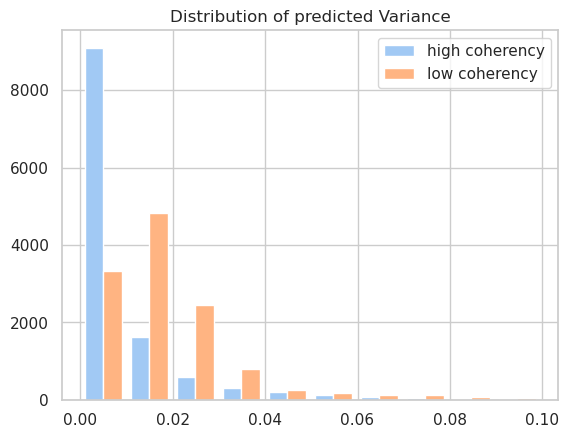

In [131]:
plt.hist([var[var < 0.1], var_high[var_high < 0.1]], label=['high coherency', 'low coherency'], bins=10, alpha=1)
plt.title('Distribution of predicted Variance')
plt.xlabel('Variance for each series')
plt.legend()
plt.savefig('results/{}_profhit_variance_pred.png'.format(dataset))

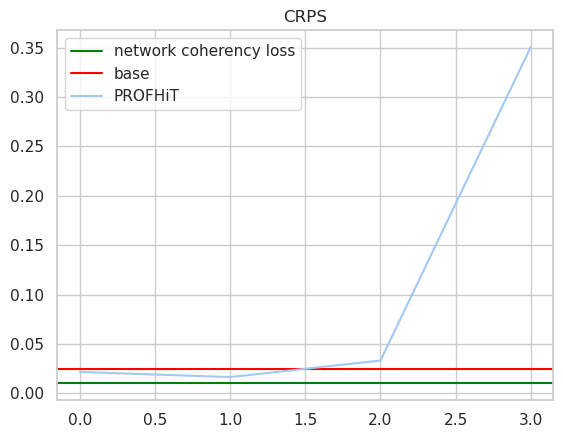

In [207]:
GET = "CRPS"

plt.axhline(y=get_mean(vae_results, names)[GET].mean(), label='network coherency loss', color='green')
plt.axhline(y=get_mean(base_vae_results, names)[GET].mean(), label='base', color='red')
# plt.axhline(y=get_mean(jsd_results_2, names)[GET].mean(), label='PROFHiT', color='blue')

jsd_ = [get_mean(jsd_res, names)[GET].mean() for jsd_res in all_jsd]
plt.plot(jsd_, label = 'PROFHiT')
# plt.ylim(0,0.04)
plt.title(GET)
plt.legend()

In [135]:
get_mean(all_jsd[0], names)["CRPS"].mean(), get_mean(all_jsd[0], names)["Coherency"].mean()

IndexError: list index out of range

In [ ]:
index = 10
get_mean(all_jsd[index], names)["CRPS"].mean(), get_mean(all_jsd[index], names)["Coherency"].mean()

In [ ]:
get_mean(all_jsd[-1], names)["CRPS"].mean(), get_mean(all_jsd[-1], names)["Coherency"].mean()

In [ ]:
GET = "WMAPE"
# plt.hist([coherency_wmape, jsd_wmape, proj_wmape], label=['network coherency loss', 'PROFHiT', 'projection'])
plt.plot(get_mean(vae_results, names)[GET], label='network coherency loss')
# plt.plot(get_mean(jsd_results, names)[GET], label='PROFHiT - 3')
# plt.plot(get_mean(jsd_results_2, names)[GET], label='PROFHiT - 2')
plt.plot(get_mean(projection_results, names)[GET], label='projection')
# plt.ylim(-0.00, 0.001)
plt.title(GET)
plt.legend()

In [528]:
# # plt.hist([coherency_wmape, jsd_wmape, proj_wmape], label=['network coherency loss', 'PROFHiT', 'projection'])
# plt.plot(coherency_wmape, label='network coherency loss')
# plt.plot(jsd_wmape, label='PROFHiT')
# plt.plot(proj_wmape, label='projection')
# plt.legend()

Text(0.5, 1.0, 'CRPS')

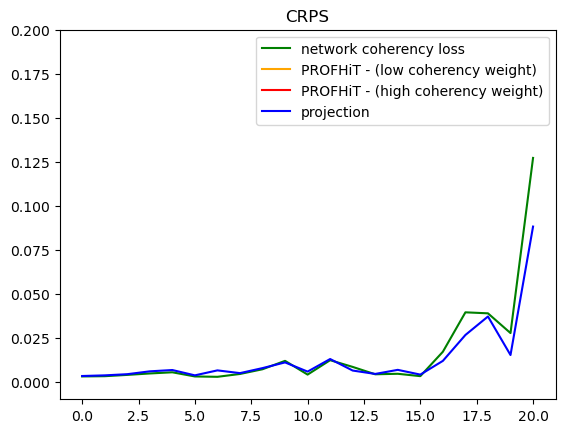

In [529]:
# plt.hist([coherency_wmape, jsd_wmape, proj_wmape], label=['network coherency loss', 'PROFHiT', 'projection'])
plt.plot(crps_coherency, label='network coherency loss', color='green')
plt.plot(jsd_crps, label='PROFHiT - (low coherency weight)', color='orange')
plt.plot(jsd_crps_2, label='PROFHiT - (high coherency weight)', color='red')
plt.plot(crps_proj, label='projection', color='blue')
plt.legend()
plt.ylim(-0.01, 0.2)
plt.title("CRPS")

Text(0.5, 1.0, 'Coherency')

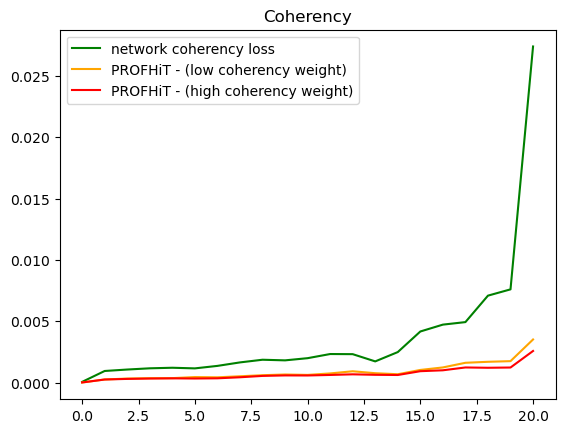

In [522]:
# plt.hist([coherency_wmape, jsd_wmape, proj_wmape], label=['network coherency loss', 'PROFHiT', 'projection'])
plt.plot(c_coherency, labwel='network coherency loss', color='green')
plt.plot(jsd_coh, label='PROFHiT - (low coherency weight)', color='orange')
plt.plot(jsd_coh_2, label='PROFHiT - (high coherency weight)', color='red')
# plt.plot(c_proj, label='projection')
plt.legend()
plt.title("Coherency")
# plt.ylim(0,0.1)

In [408]:
from Experiments import DropoutDistribution

coh_res = []

weights_coh = np.arange(0,2e-4,1e-5)
# weights_coh = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
for w in weights_coh:
    seed = 42
    torch.manual_seed(seed)       # For CPU and CUDA (if available)
    torch.cuda.manual_seed_all(seed)  # For multi-GPU setups
    np.random.seed(seed)          # NumPy
    random.seed(seed)             # Python's random module
    os.environ['PYTHONHASHSEED'] = str(seed)  # Hash-based operations

    params = {'n_series':data.shape[1], 'hidden_dim':128, 'latent_dim':128, 'lr':1e-3, 'n_epochs':1000, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
              'coherency_loss':True, 'profhit':False, 'coherency_weight':w, 'project':False}

    coherency_results, names, coherency_losses = repeat_exp(DropoutDistribution, base_agg_mat, data, params, 1) 
    mean_res = get_mean(coherency_results, names)
    coh_res.append(mean_res)

run 0


100%|██████████| 1000/1000 [00:24<00:00, 40.16it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.51it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.31it/s]


run 0


100%|██████████| 1000/1000 [00:23<00:00, 42.02it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.18it/s]


run 0


100%|██████████| 1000/1000 [00:22<00:00, 45.23it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.42it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.40it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.54it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.36it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.26it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 40.04it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.58it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.49it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.37it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.40it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.39it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 40.27it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.45it/s]


run 0


100%|██████████| 1000/1000 [00:24<00:00, 41.37it/s]


In [361]:
profhit_res = []

weights_profhit = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
for w in weights_profhit:
    seed = 42
    torch.manual_seed(seed)       # For CPU and CUDA (if available)
    torch.cuda.manual_seed_all(seed)  # For multi-GPU setups
    np.random.seed(seed)          # NumPy
    random.seed(seed)             # Python's random module
    os.environ['PYTHONHASHSEED'] = str(seed)  # Hash-based operations

    params = {'n_series':data.shape[1], 'hidden_dim':128, 'latent_dim':128, 'lr':1e-3, 'n_epochs':1000, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
              'coherency_loss':False, 'profhit':False, 'coherency_weight':w, 'project':False, 'jsd':True}

    jsd_results, names, jsd_losses = repeat_exp(JSDDistribution, base_agg_mat, data, params, 1) 
    jsd_results = jsd_results[~np.isnan(jsd_results)].reshape(-1, 21, 4)
    
    mean_res = get_mean(jsd_results, names)
    profhit_res.append(mean_res)

run 0


100%|██████████| 1000/1000 [00:27<00:00, 36.43it/s]


run 0


  0%|          | 0/1000 [00:00<?, ?it/s]/home/jovyan/Rares/time_series/kdd/coherency.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_means = torch.tensor(torch.mean(data, dim=0), device=device).float()
/home/jovyan/Rares/time_series/kdd/coherency.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_std = torch.tensor(torch.std(data, dim=0), device=device).float()
100%|██████████| 1000/1000 [00:26<00:00, 37.08it/s]


run 0


  0%|          | 0/1000 [00:00<?, ?it/s]/home/jovyan/Rares/time_series/kdd/coherency.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_means = torch.tensor(torch.mean(data, dim=0), device=device).float()
/home/jovyan/Rares/time_series/kdd/coherency.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_std = torch.tensor(torch.std(data, dim=0), device=device).float()
100%|██████████| 1000/1000 [00:27<00:00, 36.85it/s]


run 0


  0%|          | 0/1000 [00:00<?, ?it/s]/home/jovyan/Rares/time_series/kdd/coherency.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_means = torch.tensor(torch.mean(data, dim=0), device=device).float()
/home/jovyan/Rares/time_series/kdd/coherency.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_std = torch.tensor(torch.std(data, dim=0), device=device).float()
100%|██████████| 1000/1000 [00:26<00:00, 37.15it/s]


run 0


  0%|          | 0/1000 [00:00<?, ?it/s]/home/jovyan/Rares/time_series/kdd/coherency.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_means = torch.tensor(torch.mean(data, dim=0), device=device).float()
/home/jovyan/Rares/time_series/kdd/coherency.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_std = torch.tensor(torch.std(data, dim=0), device=device).float()
100%|██████████| 1000/1000 [00:27<00:00, 36.94it/s]


run 0


  0%|          | 0/1000 [00:00<?, ?it/s]/home/jovyan/Rares/time_series/kdd/coherency.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_means = torch.tensor(torch.mean(data, dim=0), device=device).float()
/home/jovyan/Rares/time_series/kdd/coherency.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_std = torch.tensor(torch.std(data, dim=0), device=device).float()
100%|██████████| 1000/1000 [00:27<00:00, 36.30it/s]


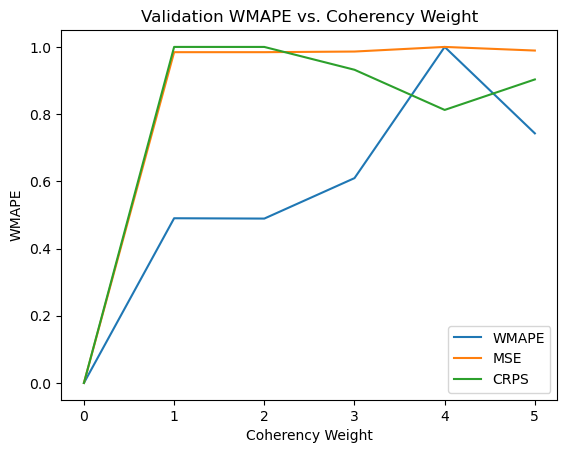

In [402]:
wmapes = np.array([res["WMAPE"].mean() for res in profhit_res])
crpss = np.array([res["CRPS"].mean() for res in profhit_res])
mses = np.array([res["MSE"].mean() for res in profhit_res])
plt.plot(range(len(crpss)), (wmapes-wmapes.min())/(wmapes-wmapes.min()).max(), label="WMAPE")
plt.plot(range(len(crpss)), (mses-mses.min())/(mses-mses.min()).max(), label="MSE")
plt.plot(range(len(crpss)), (crpss-crpss.min())/(crpss-crpss.min()).max(), label="CRPS")
plt.xlabel('Coherency Weight')
plt.ylabel(GET)
plt.title("Validation " + GET + " vs. Coherency Weight")
plt.legend()

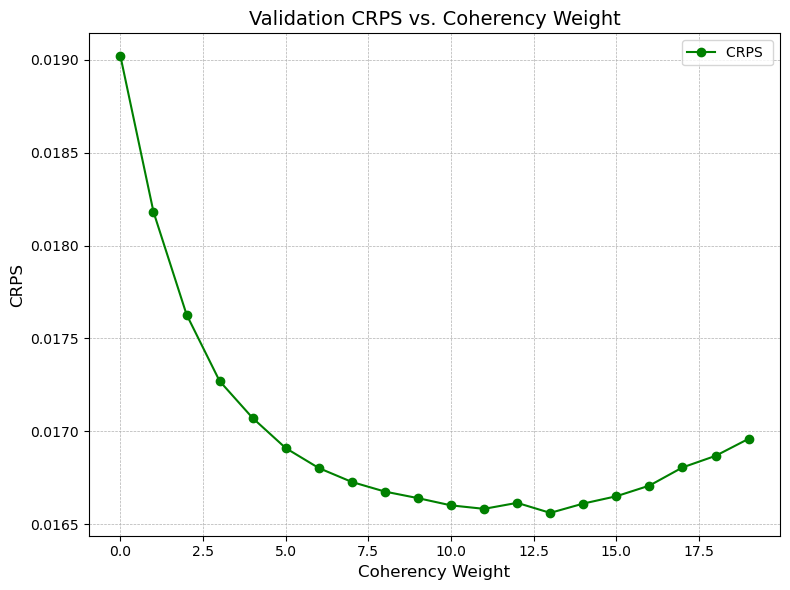

In [435]:
GET = "CRPS" 
# plt.plot([res[GET].mean() for res in coh_res])


plt.figure(figsize=(8, 6))
plt.plot([res[GET].mean() for res in coh_res], marker='o', linestyle='-', color='g', label=GET + " ")
plt.xlabel('Coherency Weight', fontsize=12)
plt.ylabel(GET, fontsize=12)
plt.title("Validation " + GET + " vs. Coherency Weight", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
# plt.show()
plt.savefig('results/{}_{}_vs_weight.png'.format(dataset, GET))


In [410]:
res[GET][0]

0.03453734517097473

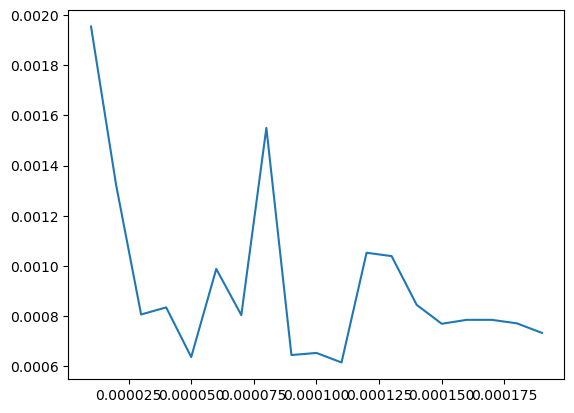

In [314]:
plt.plot(weights_coh[1:], [res["Coherency"].quantile(0.1) for res in coh_res][1:])

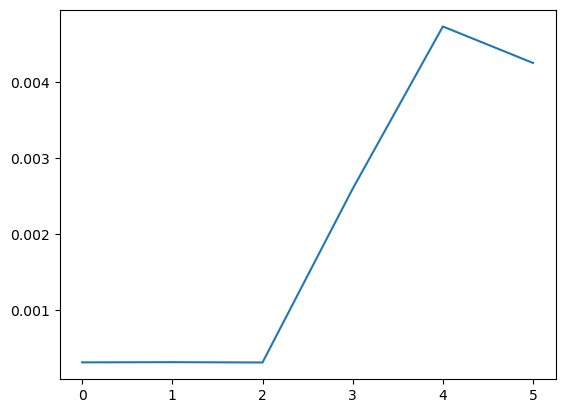

In [404]:
plt.plot([res["Coherency"].quantile(0.1) for res in profhit_res])